In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('mode.chained_assignment', 'raise')

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To be ran after Table_Simulation.ipynb but before Analysis.ipynb

## Contents
1. Loading in prepared tables.

**Section One**
1. Metric per Capita from 2014-2018 **[Now]**
    - Mean Overdose deaths from 2014-2018 for decriminalised vs criminalised countries (bar chart)
    - Mean Overdose deaths from 2014-2018 for decriminalised vs criminalised countries (boxplot)
    - Mean Overdose deaths for decriminalised vs criminalised countries (lineplot)
    
    - Mean Use Offences from 2014-2018 for decriminalised vs criminalised countries (bar chart)
    - Mean Use Offences from 2014-2018 for decriminalised vs criminalised countries (boxplot)
    
    - Mean Offenders from 2014-2018 for decriminalised vs criminalised countries (bar chart)
    - Mean Offenders from 2014-2018 for decriminalised vs criminalised countries (boxplot)
    
2. Metric per Capita with Date of Formal Decriminalisation **[Then]**
    - Mean Overdose deaths for all countries (lineplot)
    - Mean Overdose deaths for decriminalised countries (lineplot)
    
    - Mean Use Offences for all countries (lineplot)
    - Mean Use Offences for decriminalised countries (lineplot)
    
    - Mean Number of Offenders for all countries (lineplot)
    - Mean Number of Offenders for decriminalised countries (lineplot)

**Section Two**

1. Metric per Capita from 2014-2018 by Drug Law Severity (bar chart and boxplot)
    - Overdoses per Capita from 2014-2018 by Drug Law Severity (bar chart)
    - Overdoses per Capita from 2014-2018 by Drug Law Severity (boxplot)
    
    - Use Offences per Capita from 2014-2018 by Drug Law Severity (bar chart)
    - Use Offences per Capita from 2014-2018 by Drug Law Severity (boxplot)
    
    - Number of Offenders per Capita from 2014-2018 by Drug Law Severity (bar chart)
    - Number of Offenders per Capita from 2014-2018 by Drug Law Severity (boxplot)



**Loading in prepared tables**

In [2]:
# Here we load in our cleaned data tables with date set as index.
overdosedeaths_per_capita = pd.read_csv('overdosedeaths_per_capita.csv').set_index('Date')
offenders_per_capita = pd.read_csv('offenders_per_capita.csv').set_index('Date')
n_UseOffences_per_capita = pd.read_csv('n_UseOffences_per_capita.csv').set_index('Date')


In [3]:
# Here we load in the categorical data master table. It contains things like country name, decriminalisation date, status, and has colours for decriminalisation status as well as individual country per row.
europe_criminalisation_status_with_colour = pd.read_csv('europe_criminalisation_status_with_colour.csv').set_index('Country')

# Making a variable of only decriminalised or criminalised countries. The master table includes the full UK data for the two metrics, and a separate 'country name' for UK (England & Wales). So for the criminalised normal list and criminalised variant list we have to remove either one. Variant removes the 'United Kingdom' leaving only 'UK (England & Wales)'
decriminalised_countries = europe_criminalisation_status_with_colour[europe_criminalisation_status_with_colour['Decriminalised'] == 'Yes'].index.values
criminalised_countries = europe_criminalisation_status_with_colour[europe_criminalisation_status_with_colour['Decriminalised'] == 'No'].index.values
criminalised_countries_variant = np.delete(criminalised_countries, 20)
criminalised_countries = np.delete(criminalised_countries, 21)


*Note: There is not much detail explaining or titling graphs as this is left for analysis where a fuller picture is presented.*

## Section One

#### Mean Overdose Deaths from 2014-2018 (bar chart, boxplot and lineplot)

In [4]:
# We select only the 2014-2018 data as when we looked further on through windowing, four years does not remove most visible trends. It is also a long enough period that most countries have data points within 2014-2018 (2015,2016,2017,2018). Also we believed four years to be short enough that our 2018 glimpse of european law would still be relevant and not have changed to much in only that four year period.

overdosedeaths_2014_to_2018 = overdosedeaths_per_capita.loc[(2015, 2016, 2017, 2018), :].copy()
# I investigated using nanmean() but it turns out that mean() does the job just fine, and ignores the Nans.
# We calculate the mean value over the four year period to smooth over noise and get more reliable values.
Mean_overdosedeaths_2014_to_2018 = pd.DataFrame()
Mean_overdosedeaths_2014_to_2018['Mean Overdoses per 1,000,000 People(2014-2018)'] = overdosedeaths_2014_to_2018.mean()

# We select the criminalised countries 2014-2018 mean values separately from the decriminalised countries. Having them ascending = false means they will plot pretty.
crim_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[criminalised_countries_variant].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)
decrim_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[decriminalised_countries].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)

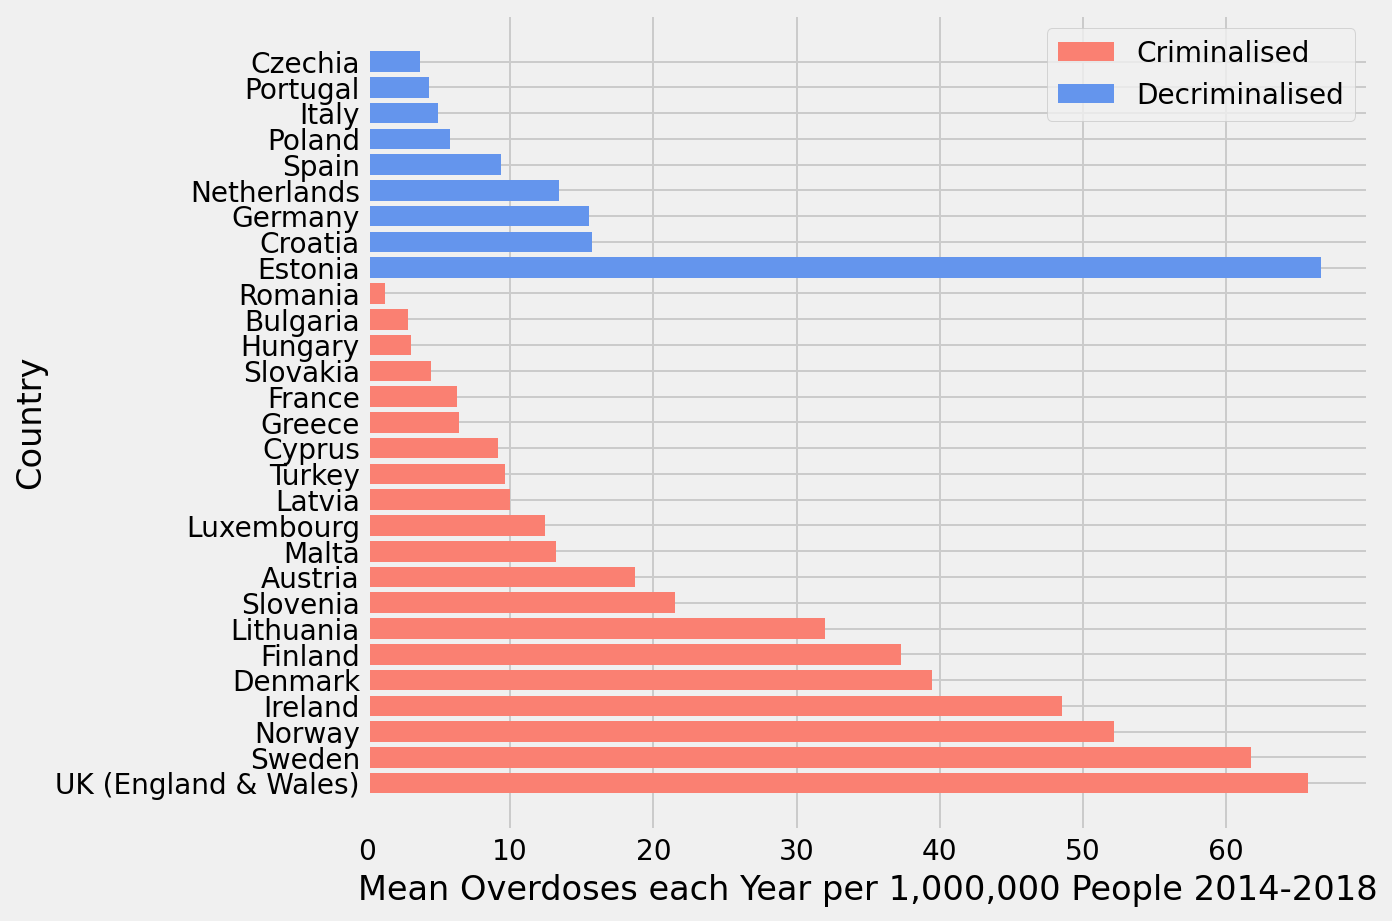

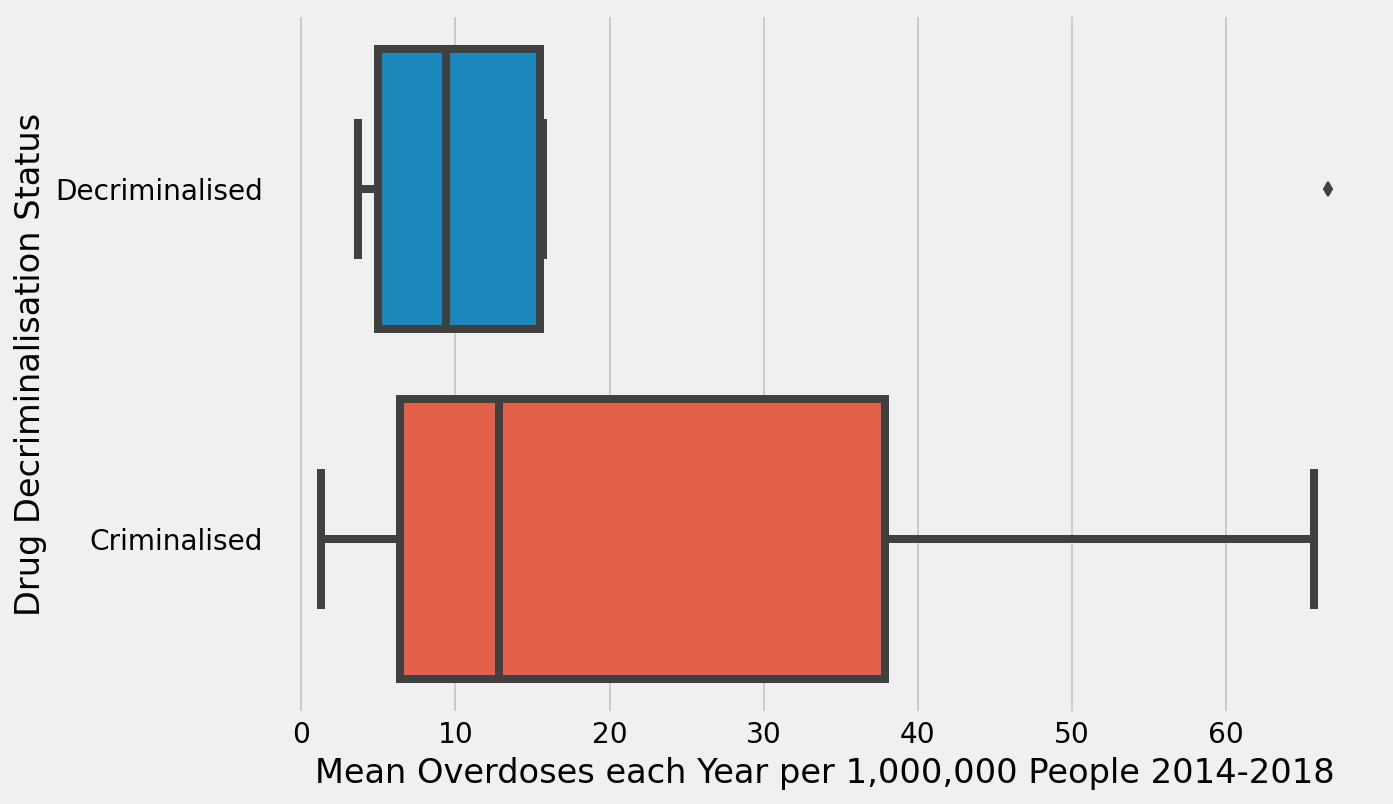

In [5]:
# Plotting the bar plot
plt.figure(figsize = (8, 7))
for country in crim_mn_2014_2018_od.index:
    plt.barh(crim_mn_2014_2018_od.index , crim_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])
for country in decrim_mn_2014_2018_od.index:
    plt.barh(decrim_mn_2014_2018_od.index , decrim_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])
# Plotted in such a way that status colour is pulled out from our categorical table in relation to every plotted line/bar.
    
    
# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Salmon', label = 'Criminalised')
plt.barh(0 , 0, color = 'Cornflowerblue', label = 'Decriminalised')

plt.xlabel('Mean Overdoses each Year per 1,000,000 People 2014-2018')
plt.ylabel('Country')
plt.legend();
plt.savefig('overdosedeathscrimvsdecrimbarchart.png', bbox_inches='tight')



# Plotting the box plot

plt.figure(figsize=(8.85,6))
sns.boxplot(data = [ decrim_mn_2014_2018_od, crim_mn_2014_2018_od] , orient='h')
plt.yticks(np.arange(2), [ 'Decriminalised', 'Criminalised'])
plt.ylabel('Drug Decriminalisation Status');
plt.xlabel('Mean Overdoses each Year per 1,000,000 People 2014-2018')
# Line is the median. Significant overlap. Diminishing returns after decriminalisation? Other factors that matter more after not seeing addicts as criminals?
plt.savefig('overdosedeathscrimvsdecrimboxplot.png', bbox_inches='tight')


# I plotted these in the same cell because they are analysed and presented together - saying many of the same things.

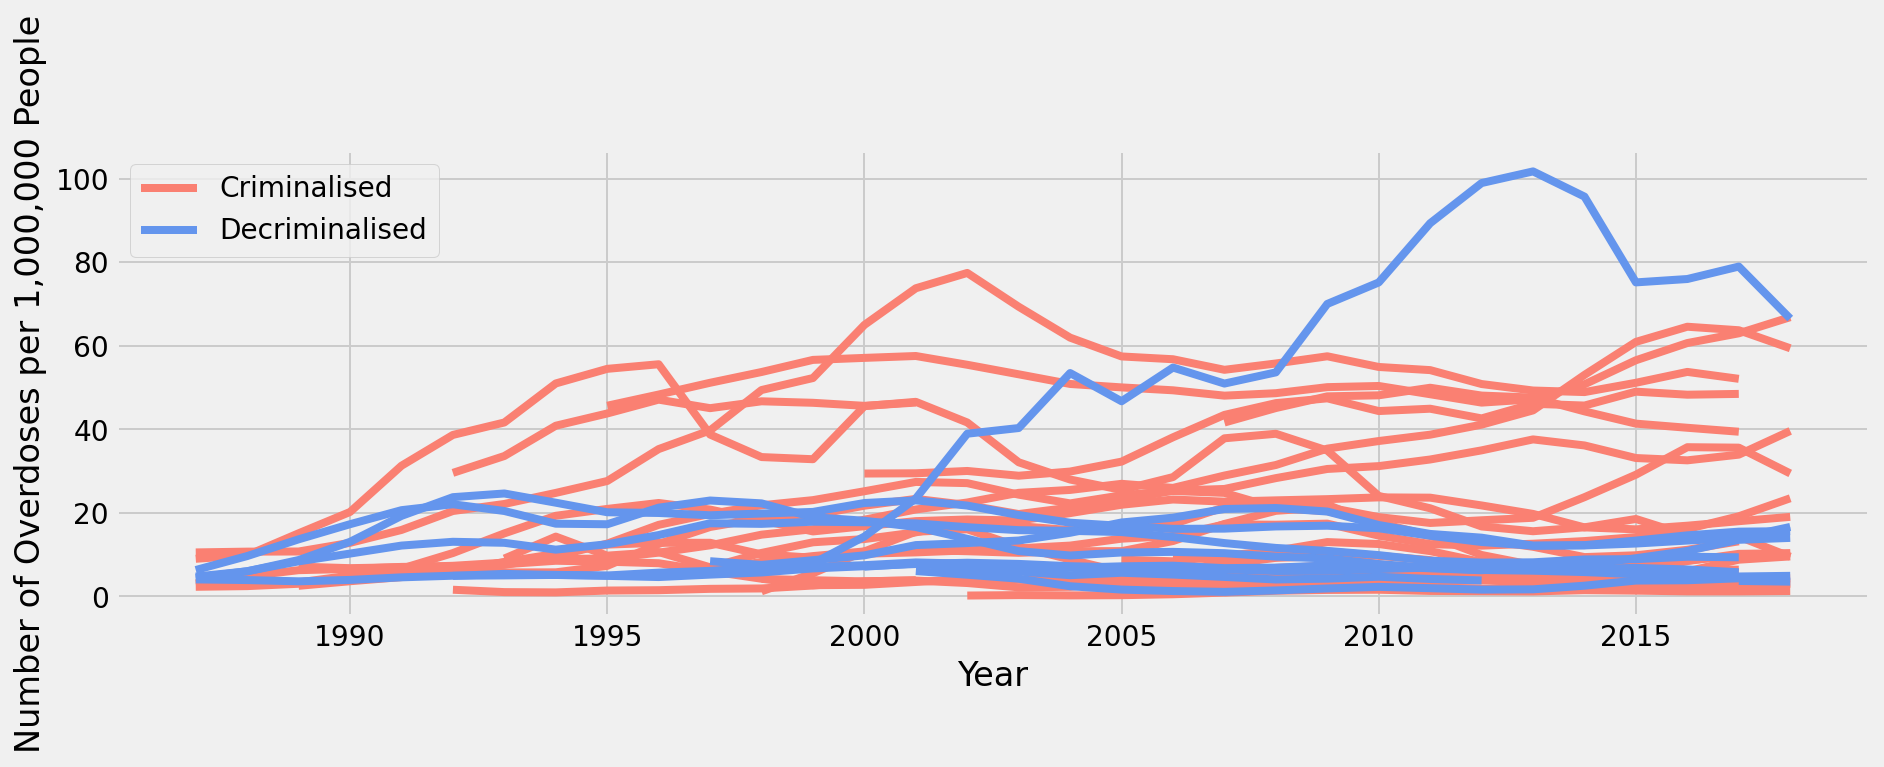

In [6]:
# A line plot over time comparing decriminalised vs criminalised countries. Help identify trends.

decriminalised_overdoses = overdosedeaths_per_capita[decriminalised_countries].copy()
criminalised_overdoses = overdosedeaths_per_capita[criminalised_countries_variant].copy()

plt.figure(figsize = (14, 4))

# Smoothed line plot using window. 
plt.plot(criminalised_overdoses.index, criminalised_overdoses.rolling(window = 3).mean(), color = 'salmon')
plt.plot(decriminalised_overdoses.index, decriminalised_overdoses.rolling(window = 3).mean(), color = 'cornflowerblue')

plt.plot([], [], color = 'salmon', label = 'Criminalised')
plt.plot([], [], color = 'cornflowerblue', label = 'Decriminalised')

plt.ylabel('Number of Overdoses per 1,000,000 People')
plt.xlabel('Year')

plt.legend();

plt.savefig('overdosedeathscrimvsdecrimlineplot.png', bbox_inches='tight')

#### Mean Use Offences from 2014-2018 (bar chart and boxplot)

In [7]:
use_offences_per_capita_2014_to_2018 = n_UseOffences_per_capita.loc[(2015, 2016, 2017, 2018), :].copy()

Mean_use_offences_per_capita_2014_to_2018 = pd.DataFrame()
Mean_use_offences_per_capita_2014_to_2018['Mean Use Offences per 1,000,000 People(2014-2018)'] = use_offences_per_capita_2014_to_2018.mean()
# Certain countries didn't have an appropriate amount of data for 2014-2018. The limit that we set for plotting and or analysis for the 'now' question is whether or not it had any data available between 2014-2018. 
# They were deleted from the lists used for boolean selection before use. Austria, Bulgaria, Romania for use offences per capit criminalised. The Netherlands for decriminalised.
criminalised_countries_useoff = np.delete(criminalised_countries, (0, 2, 15))
decriminalised_countries_useoff =  np.delete(decriminalised_countries, (5))

decriminalised_useoffences = n_UseOffences_per_capita[decriminalised_countries_useoff]
criminalised_useoffences = n_UseOffences_per_capita[criminalised_countries_useoff]


crim_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[criminalised_countries_useoff].dropna().sort_values('Mean Use Offences per 1,000,000 People(2014-2018)', ascending = False)
decrim_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[decriminalised_countries_useoff].dropna().sort_values('Mean Use Offences per 1,000,000 People(2014-2018)', ascending = False)

crim_mn_2014_2018_useoff_mean = crim_mn_2014_2018_useoff.mean()
decrim_mn_2014_2018_useoff_mean = decrim_mn_2014_2018_useoff.mean()


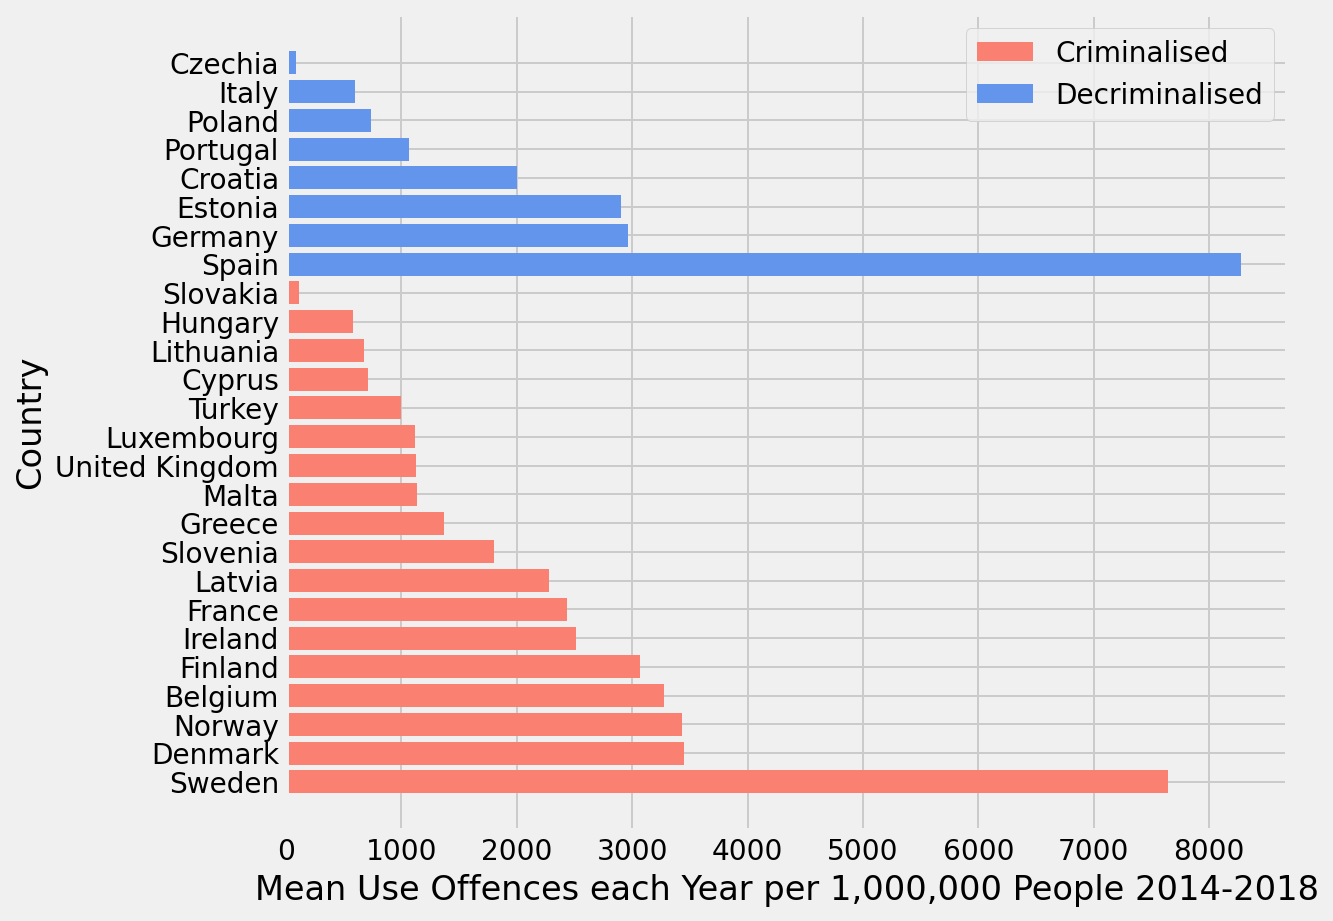

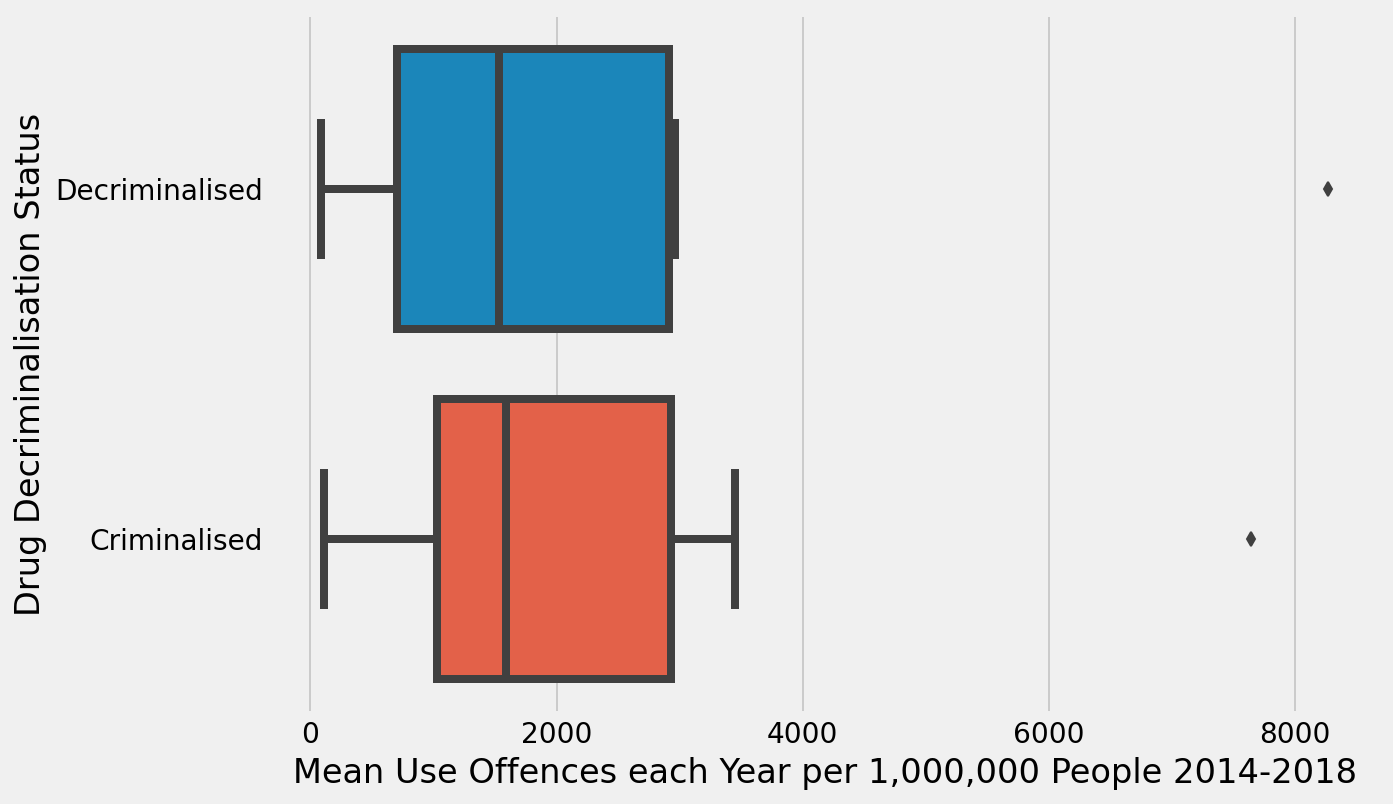

In [8]:
# Plotting useOffences
# Plotting the bar plot
plt.figure(figsize = (8, 7))
for country in crim_mn_2014_2018_useoff.index:
    plt.barh(crim_mn_2014_2018_useoff.index , crim_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])
for country in decrim_mn_2014_2018_useoff.index:
    plt.barh(decrim_mn_2014_2018_useoff.index , decrim_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])
    
# Plotted in such a way that status colour is pulled out from our categorical table in relation to every plotted line/bar.

# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Salmon', label = 'Criminalised')
plt.barh(0 , 0, color = 'Cornflowerblue', label = 'Decriminalised')

# Handling aesthetics of the plot.
plt.xlabel('Mean Use Offences each Year per 1,000,000 People 2014-2018')
plt.ylabel('Country')
plt.legend();
plt.savefig('useoffencescrimvsdecrimbarchart.png', bbox_inches='tight')


# Plotting the box plot

plt.figure(figsize=(8.85,6))
sns.boxplot(data = [ decrim_mn_2014_2018_useoff, crim_mn_2014_2018_useoff] , orient='h')
plt.yticks(np.arange(2), [ 'Decriminalised', 'Criminalised'])
plt.ylabel('Drug Decriminalisation Status');
plt.xlabel('Mean Use Offences each Year per 1,000,000 People 2014-2018')
# Line is the median. Significant overlap. Diminishing returns after decriminalisation? Other factors that matter more after not seeing addicts as criminals?
plt.savefig('useoffencescrimvsdecrimboxplot.png', bbox_inches='tight')



#### Mean Offenders per Capita from 2014-2018 (bar chart and boxplot)

In [9]:
offenders_per_capita_2014_to_2018 = offenders_per_capita.loc[(2015, 2016, 2017, 2018), :].copy()


Mean_offenders_per_capita_2014_to_2018 = pd.DataFrame()
Mean_offenders_per_capita_2014_to_2018['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'] = offenders_per_capita_2014_to_2018.mean()
# Austria, Ireland, Norway and Sweden didn't meet the requirements for data outlined previously for criminalised countries. Estonia, Germany and the Netherlands didn't meet it for decrimnalised countries.
criminalised_countries_off = np.delete(criminalised_countries, (0, 9, 14, 18))
decriminalised_countries_off =  np.delete(decriminalised_countries, (2,3,5))
# Needs a decriminalised y/n column.
crim_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[criminalised_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)
decrim_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[decriminalised_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)

crim_mn_2014_2018_off_mean = crim_mn_2014_2018_off.mean()
decrim_mn_2014_2018_off_mean = decrim_mn_2014_2018_off.mean()



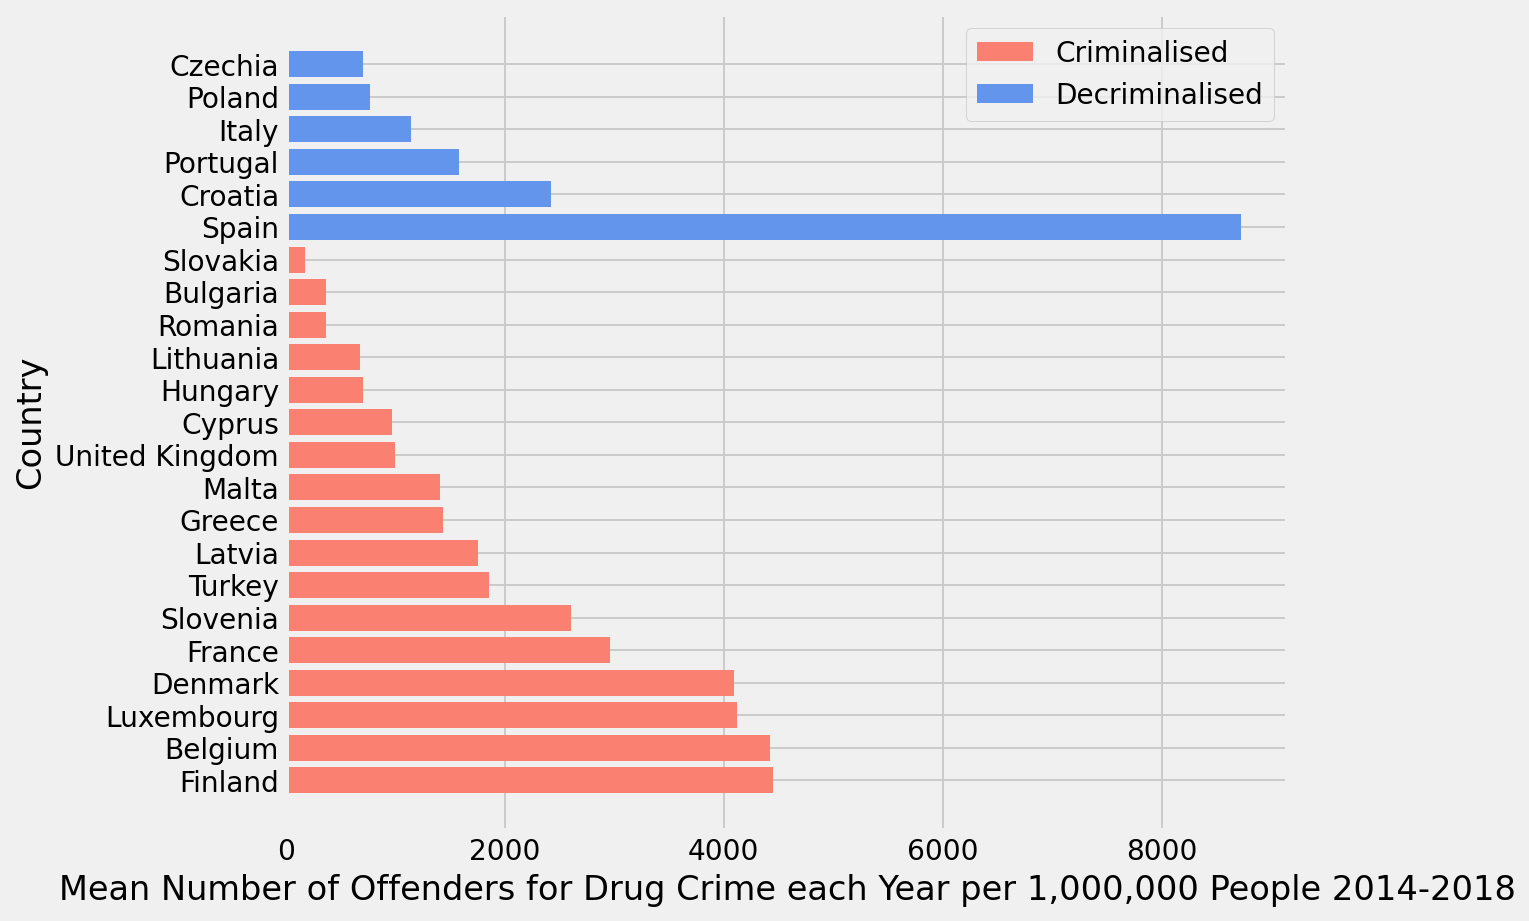

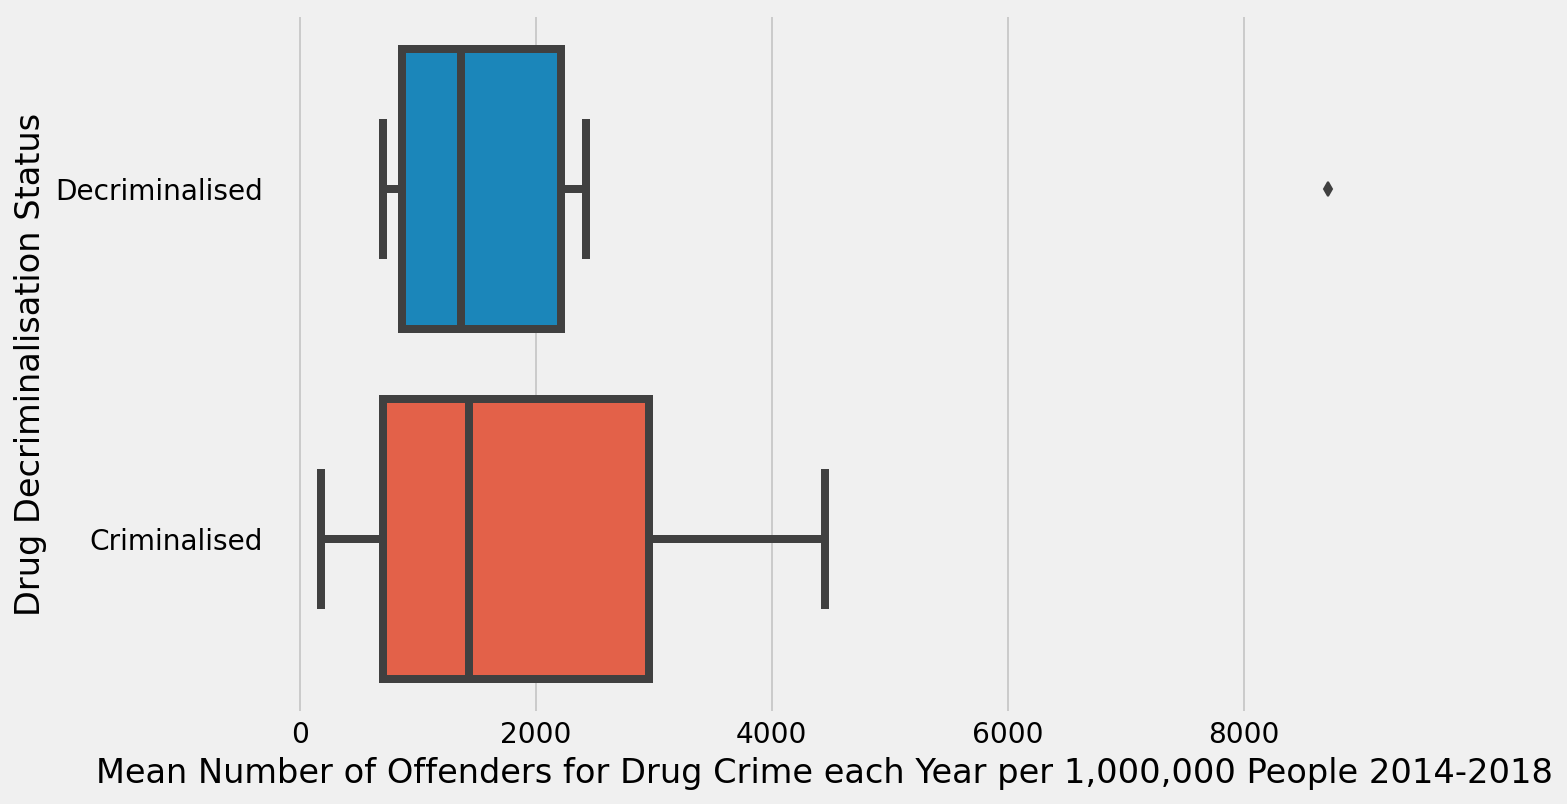

In [10]:
# Plotting Offenders
# Plotting the bar plot
plt.figure(figsize = (8, 7))
for country in crim_mn_2014_2018_off.index:
    plt.barh(crim_mn_2014_2018_off.index , crim_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])
for country in decrim_mn_2014_2018_off.index:
    plt.barh(decrim_mn_2014_2018_off.index , decrim_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'],
            color = europe_criminalisation_status_with_colour.loc[country]['StatusColour'])

# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Salmon', label = 'Criminalised')
plt.barh(0 , 0, color = 'Cornflowerblue', label = 'Decriminalised')

plt.xlabel('Mean Number of Offenders for Drug Crime each Year per 1,000,000 People 2014-2018')
plt.ylabel('Country')
plt.legend();
plt.savefig('numoffenderscrimvsdecrimbarchart.png', bbox_inches='tight')


# Plotting the box plot
import seaborn as sns
plt.figure(figsize=(8.85,6))
sns.boxplot(data = [ decrim_mn_2014_2018_off, crim_mn_2014_2018_off] , orient='h')
plt.yticks(np.arange(2), [ 'Decriminalised', 'Criminalised'])
plt.ylabel('Drug Decriminalisation Status');
plt.xlabel('Mean Number of Offenders for Drug Crime each Year per 1,000,000 People 2014-2018')
plt.savefig('numoffenderscrimvsdecrimboxplot.png', bbox_inches='tight')



#### Overdoses per Capita with Date of Formal Decriminalisation (lineplots)

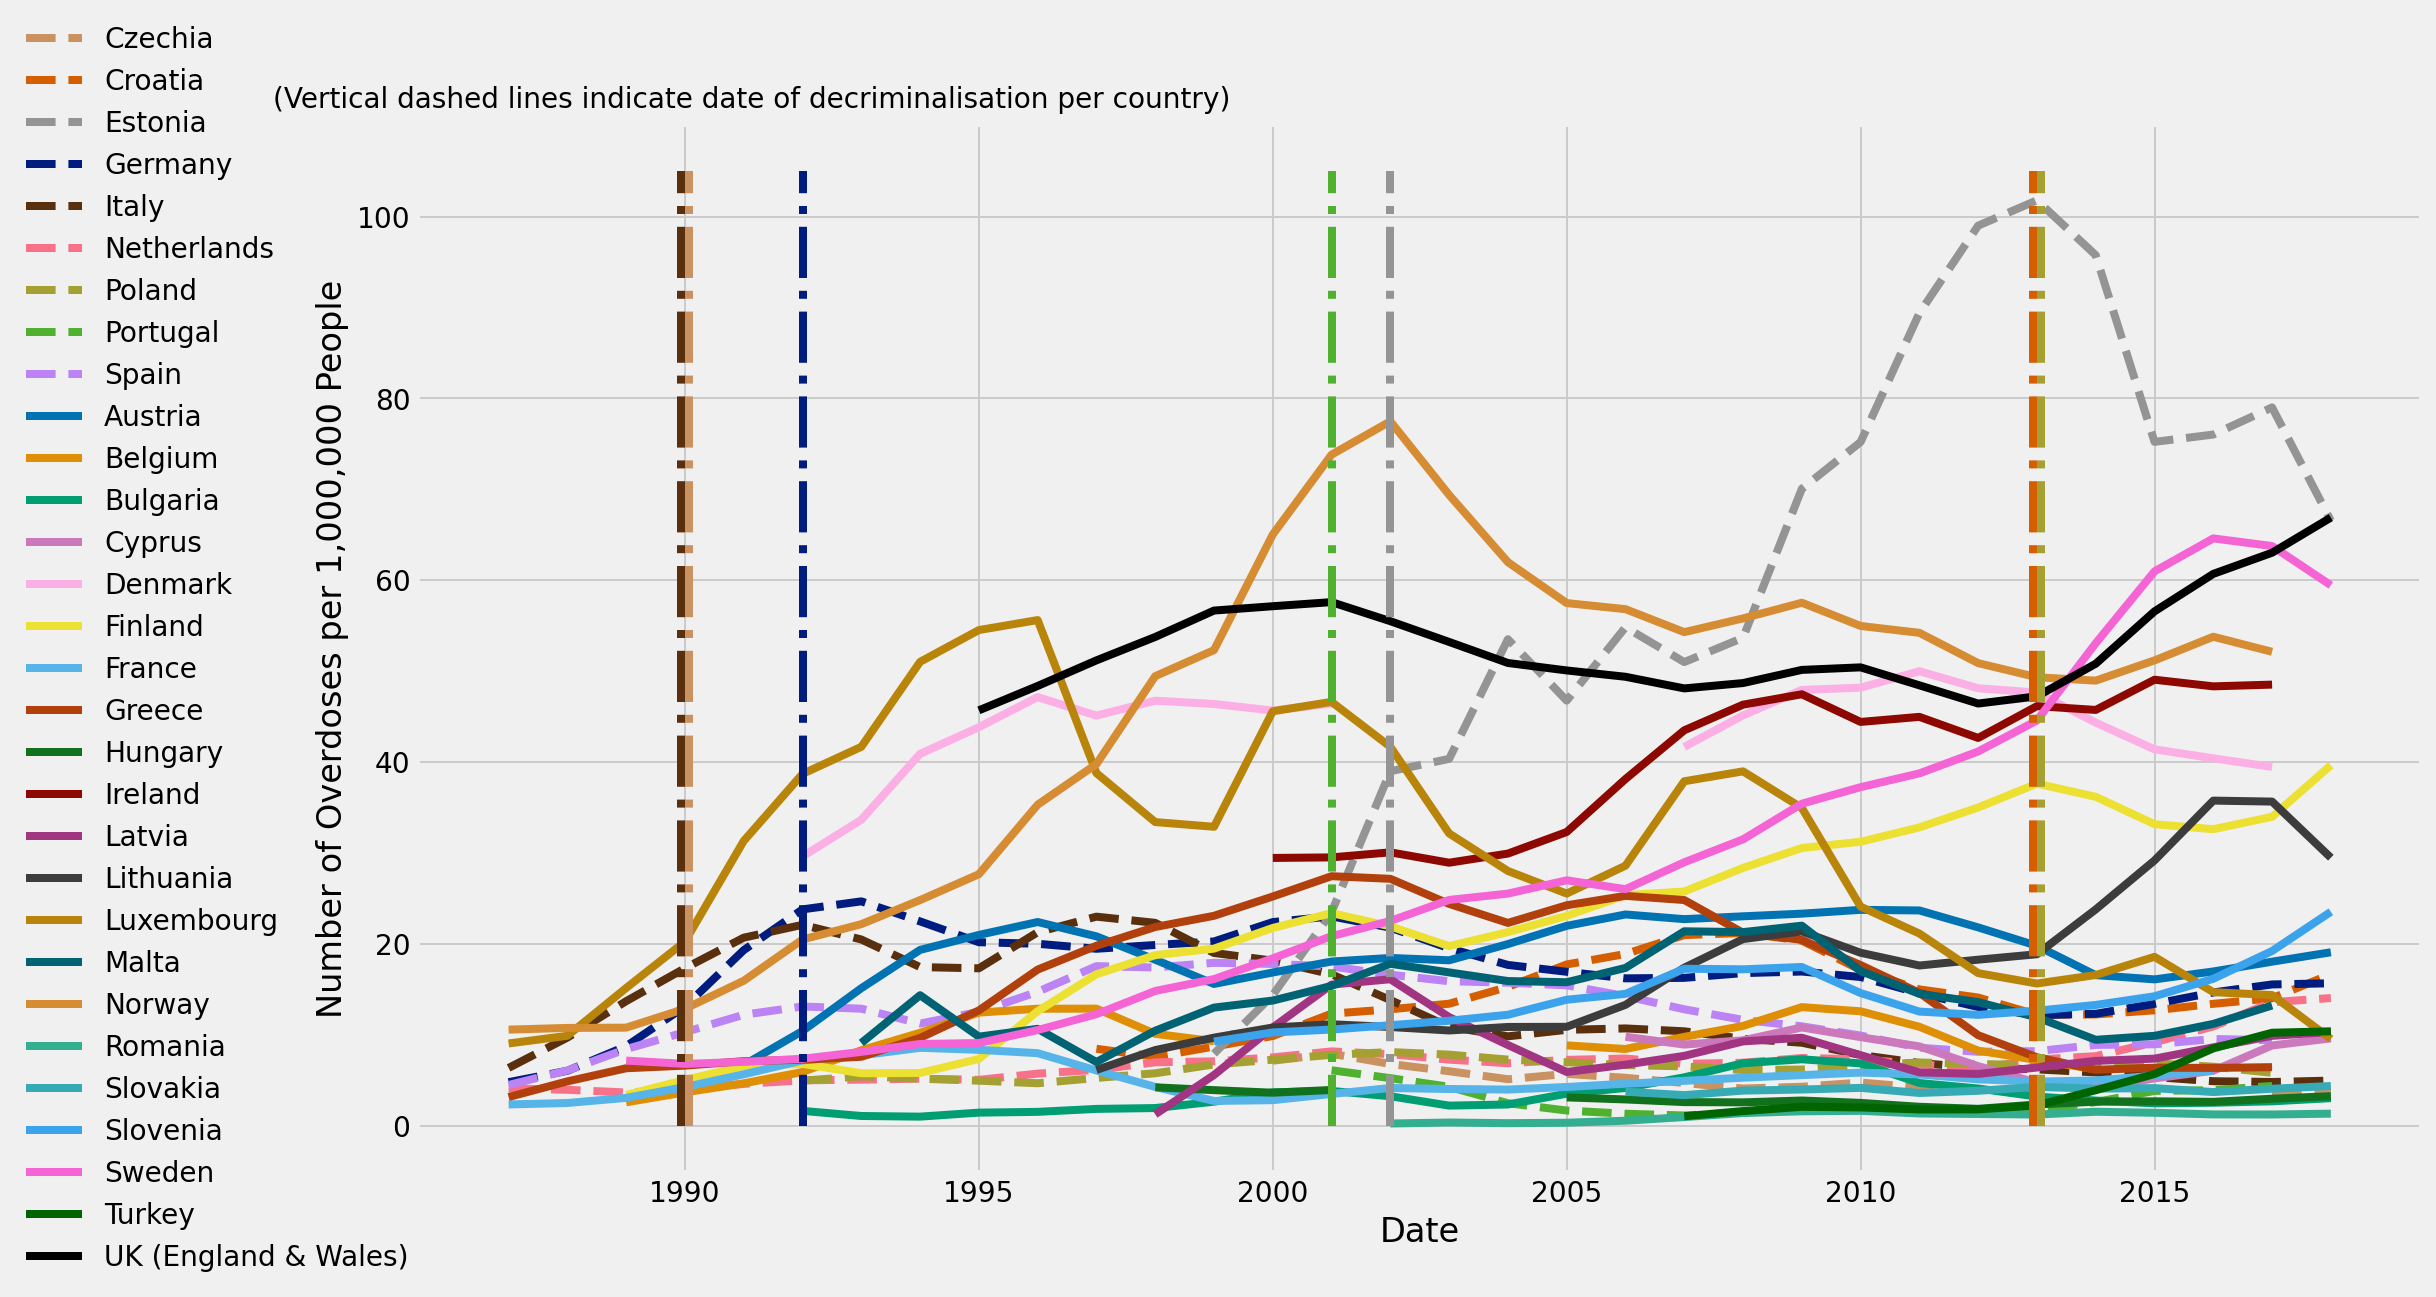

In [11]:
# Decriminalised countries plotted with dashed lines and their own colour, criminalised with solid lines and their own colour. Vertical dashed lines denoting date of decriminalisation if date on plot.

plt.figure(figsize = (16, 9))

for country in decriminalised_overdoses.columns:
    plt.plot(decriminalised_overdoses.index, decriminalised_overdoses[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')

for country in criminalised_overdoses.columns:
    plt.plot(criminalised_overdoses.index, criminalised_overdoses[country].rolling(window = 3).mean(),
    color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country)

# Spain and Netherlands decriminalised before the start point in this graph. This is the most exhaustive manual plotting, and the rest only require copy and pasting.
plt.plot([(europe_criminalisation_status_with_colour.loc['Czechia']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Czechia']['Date of Decriminalisation']+ 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Czechia']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Italy']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Italy']['Date of Decriminalisation']- 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Italy']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Germany']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Germany']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Germany']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Portugal']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Portugal']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Portugal']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Estonia']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Estonia']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Estonia']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Croatia']['Colour'], linestyle = 'dashdot')
    
# labelling the axes
plt.xlabel('Date')
plt.ylabel('Number of Overdoses per 1,000,000 People')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.1, 0.5), ncol = 1, frameon=False);
plt.text(1983,112,  '(Vertical dashed lines indicate date of decriminalisation per country)', ha='left')

plt.savefig('overdosedeathsallcountrieslineplot.png', bbox_inches='tight')





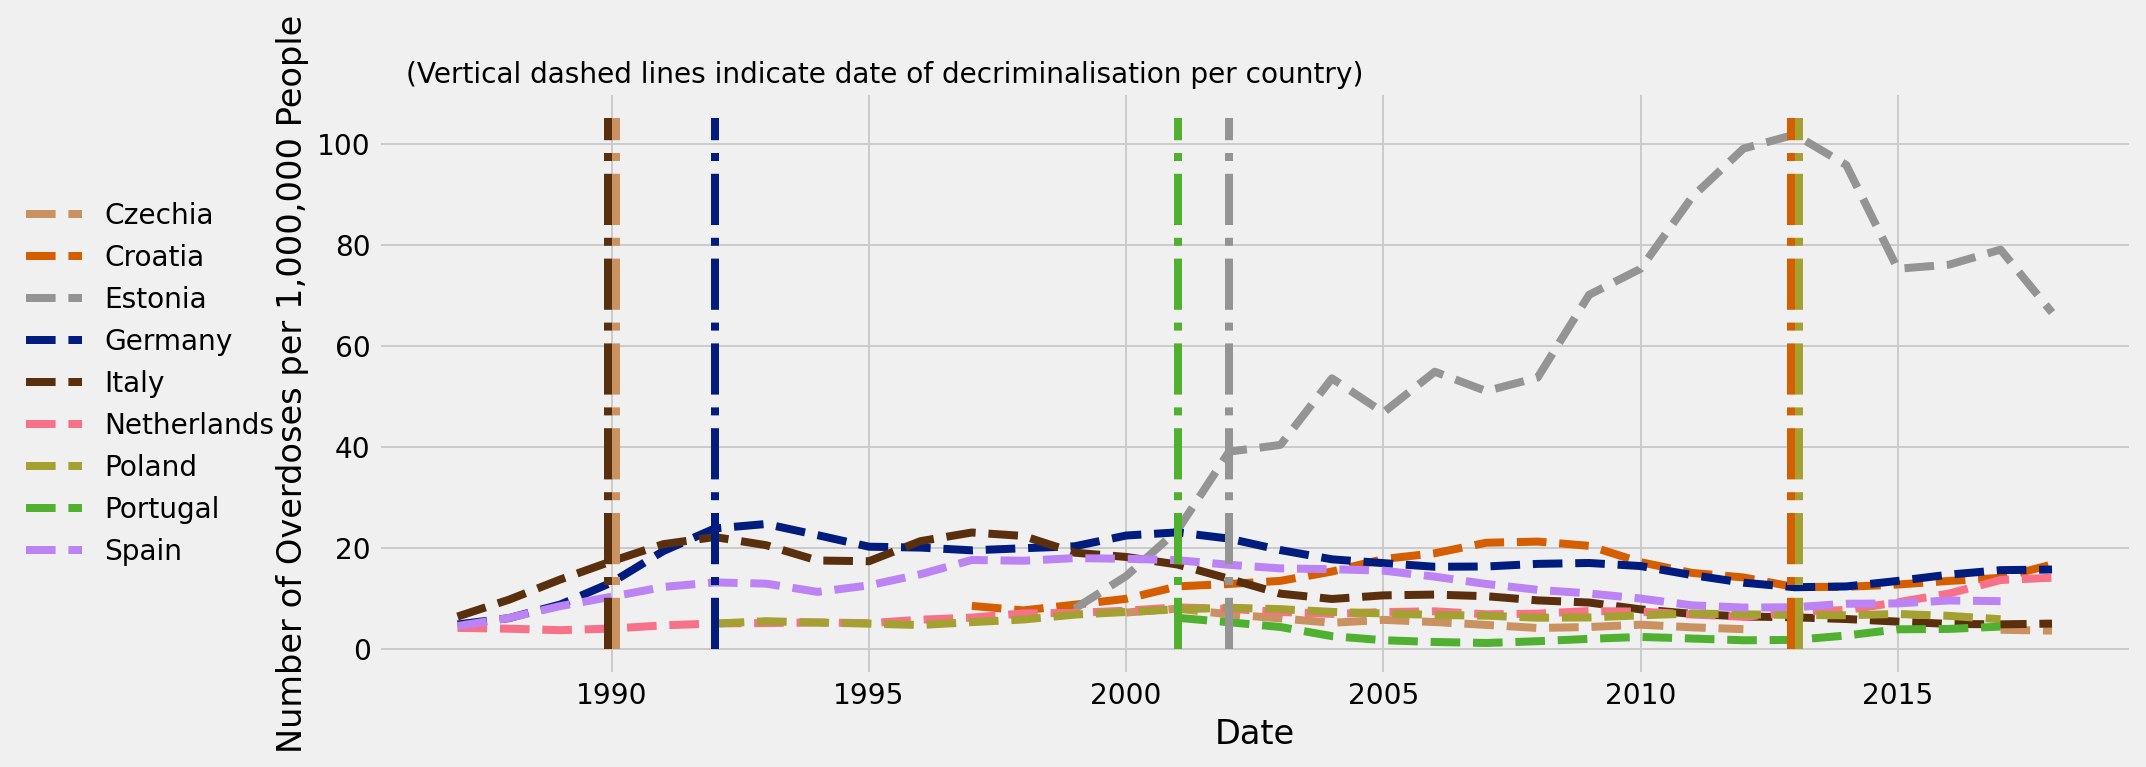

In [12]:
# The same as above but just the decriminalised countries to focus on them

# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 5))

for country in decriminalised_overdoses.columns:
    plt.plot(decriminalised_overdoses.index, decriminalised_overdoses[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')
# Spain and Netherlands decriminalised before the start point in this graph. This is the most exhaustive manual plotting, and the rest only require copy and pasting.
# Italy and Czechia, and Poland and Croatia decriminalised on the same years. 
# Shifted slightly lines to prevent overlapping on graph. Keep them visible.
plt.plot([(europe_criminalisation_status_with_colour.loc['Czechia']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Czechia']['Date of Decriminalisation']+ 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Czechia']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Italy']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Italy']['Date of Decriminalisation']- 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Italy']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Germany']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Germany']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Germany']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Portugal']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Portugal']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Portugal']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Estonia']['Date of Decriminalisation']), (europe_criminalisation_status_with_colour.loc['Estonia']['Date of Decriminalisation'])], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Estonia']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075)], [0, 105],
color = europe_criminalisation_status_with_colour.loc['Croatia']['Colour'], linestyle = 'dashdot')
    
    
# labelling the axes
plt.xlabel('Date')
plt.ylabel('Number of Overdoses per 1,000,000 People')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.13, 0.5), ncol = 1, frameon=False);
plt.text(1986,112,  '(Vertical dashed lines indicate date of decriminalisation per country)', ha='left')

plt.savefig('overdosedeathsdecrimcountrieslineplot.png', bbox_inches='tight')



#### Use Offences per Capita with Date of Formal Decriminalisation (lineplots)

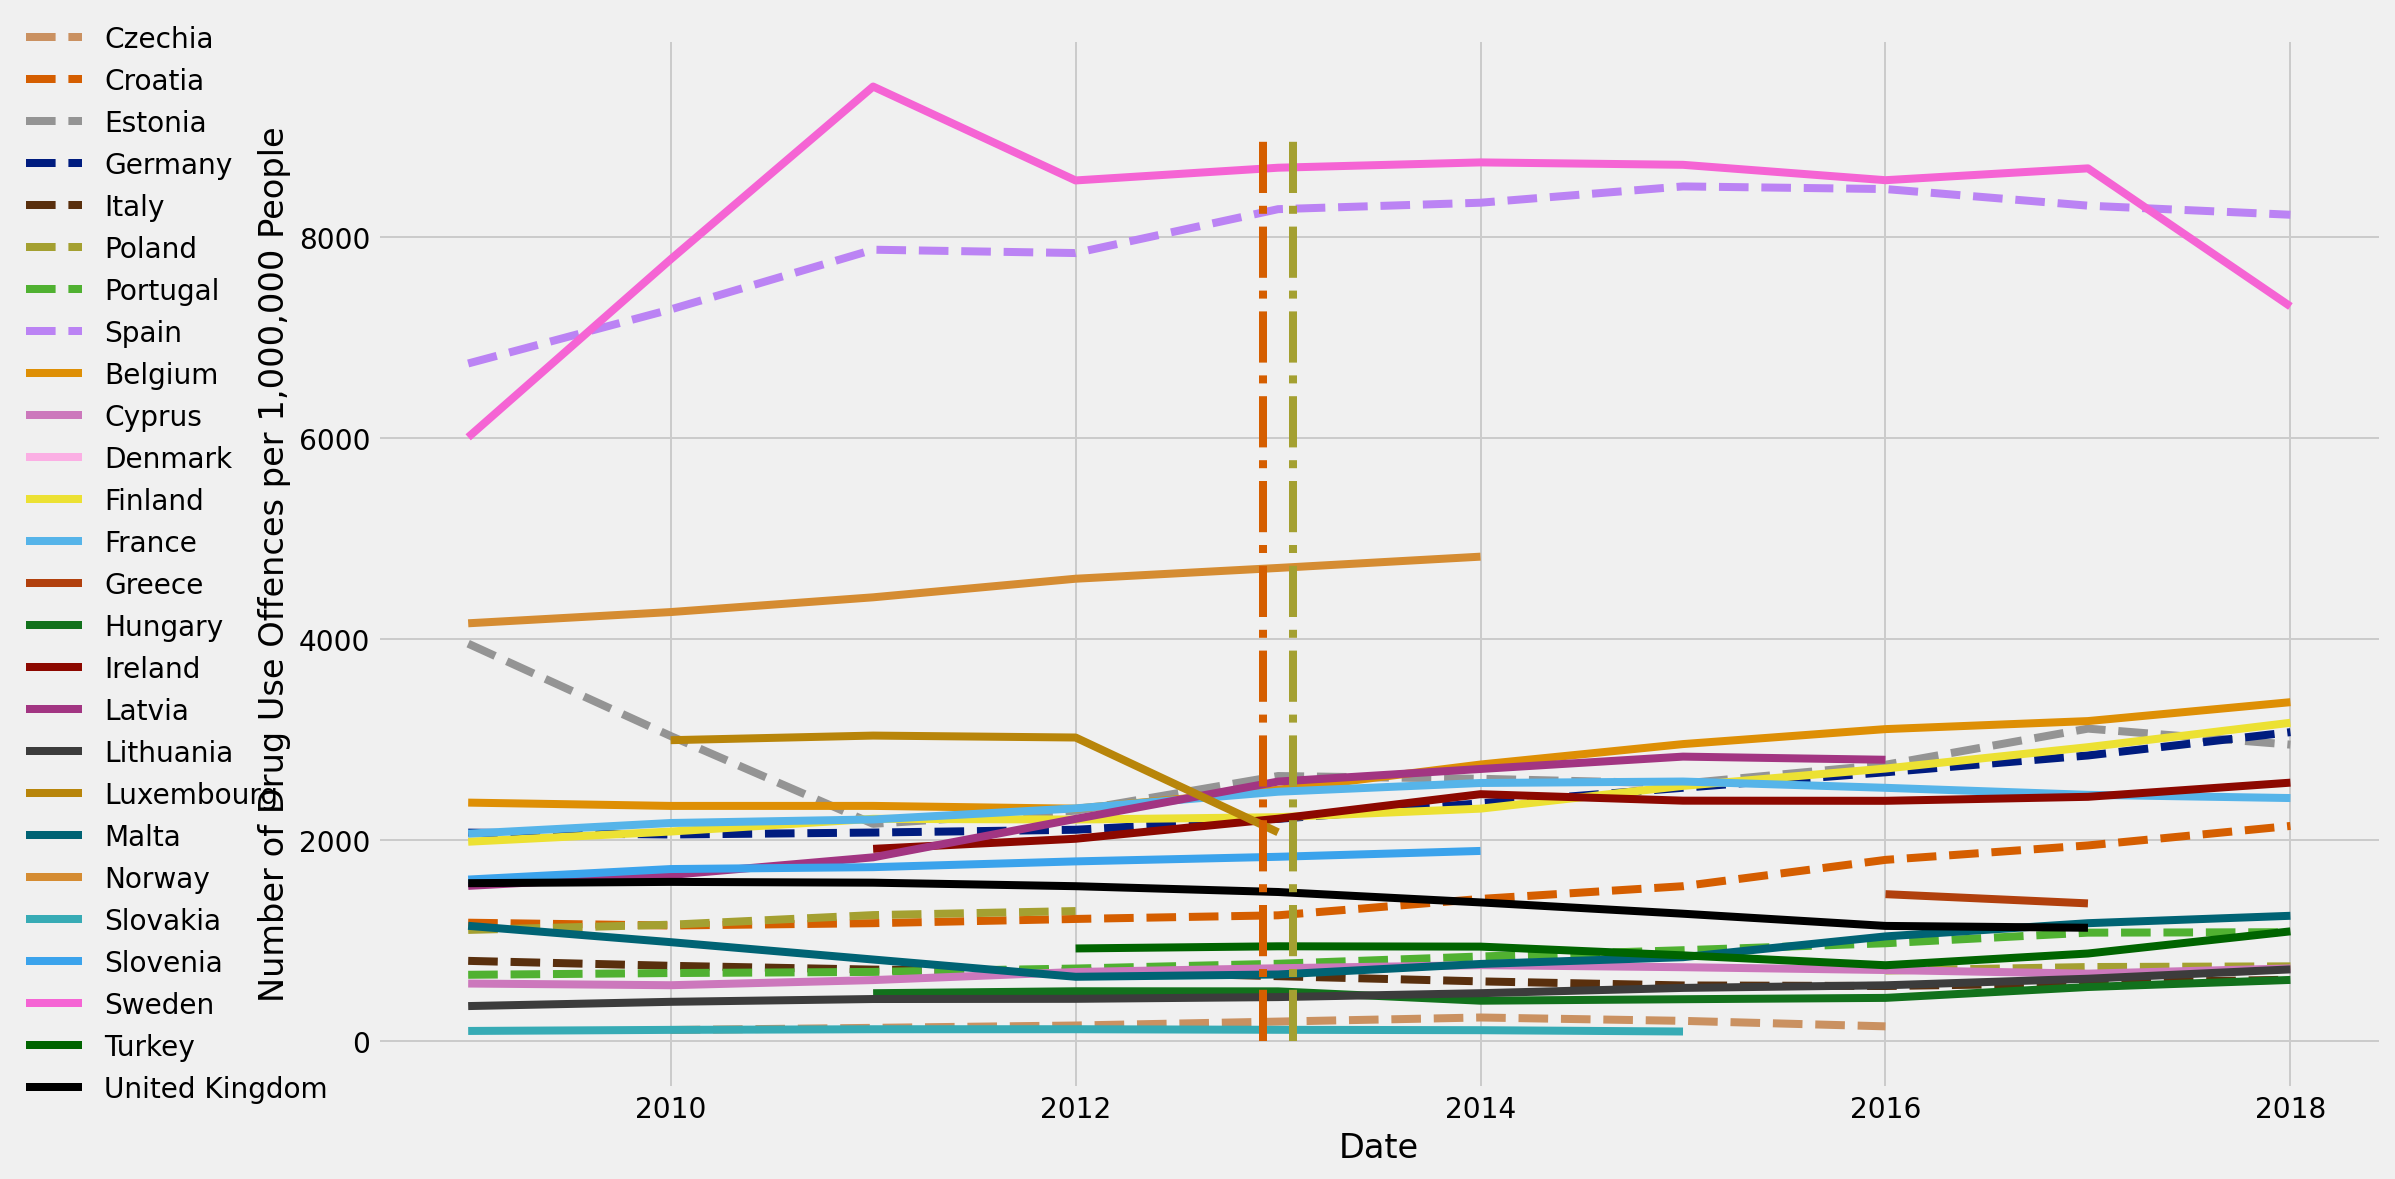

In [13]:
# Use offences
plt.figure(figsize = (16, 9))

for country in decriminalised_useoffences.columns:
    #if country in a['Country']:
    plt.plot(decriminalised_useoffences.index, decriminalised_useoffences[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')

for country in criminalised_useoffences.columns:
    plt.plot(criminalised_useoffences.index, criminalised_useoffences[country].rolling(window = 3).mean(),
    color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country)

plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075)], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Croatia']['Colour'], linestyle = 'dashdot')

# labelling the axes
plt.xlabel('Date')
plt.ylabel('Number of Drug Use Offences per 1,000,000 People')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.1, 0.5), ncol = 1, frameon=False);

plt.savefig('useoffencesallcountrieslineplot.png', bbox_inches='tight')

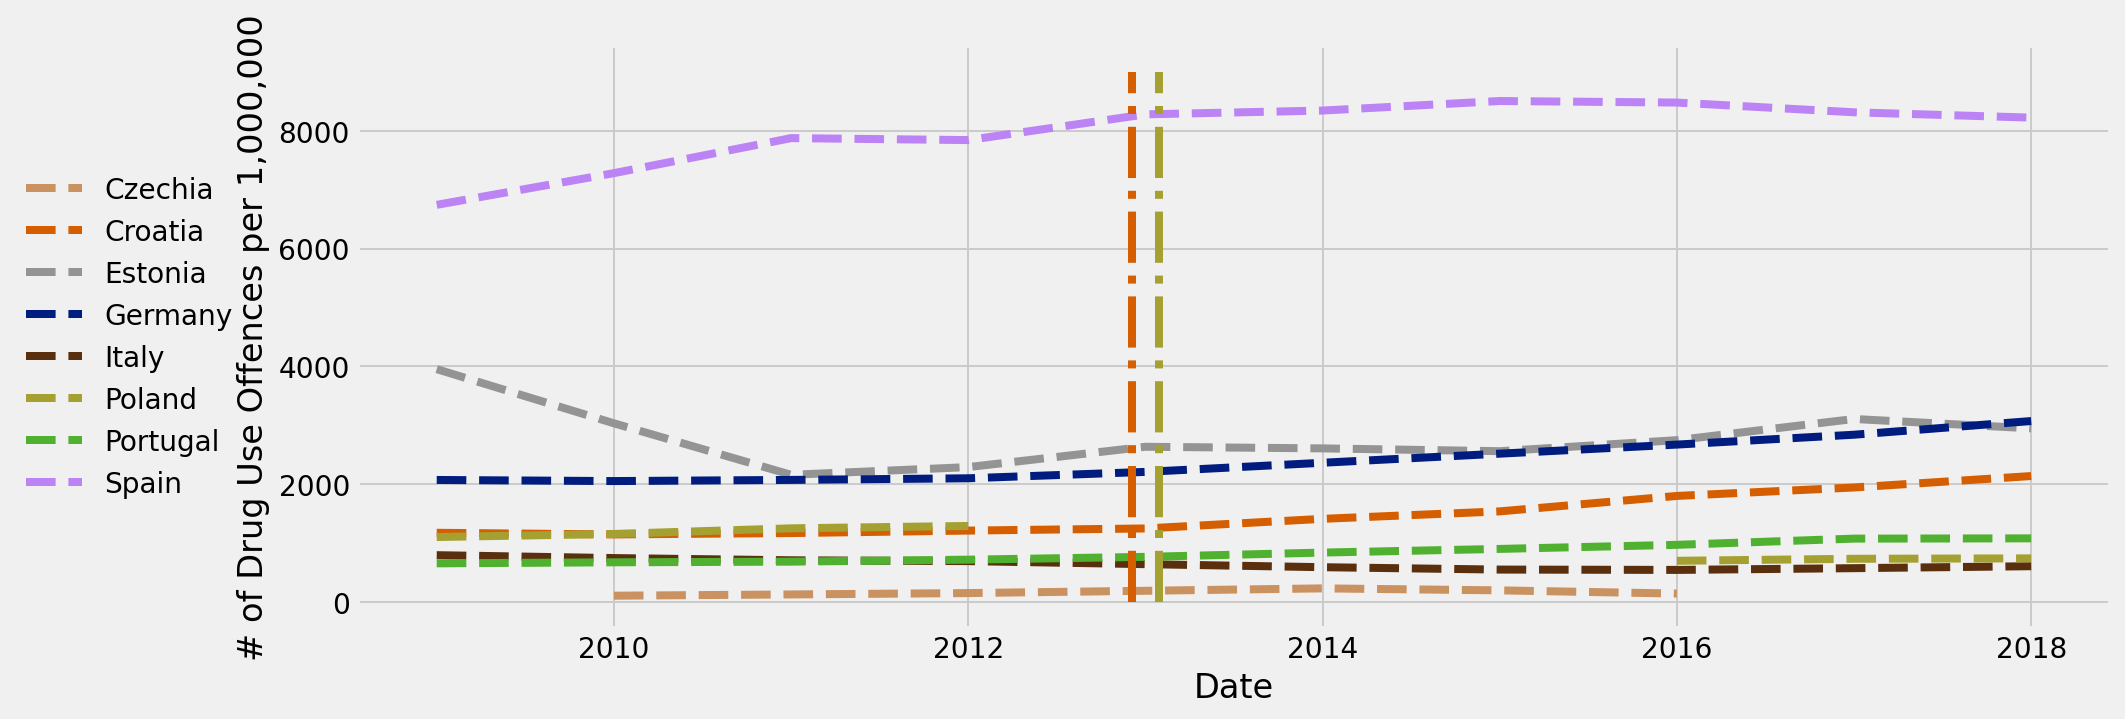

In [14]:
# The same as above but just the decriminalised countries to focus on them
plt.figure(figsize = (14, 5))

for country in decriminalised_useoffences.columns:
    plt.plot(decriminalised_useoffences.index, decriminalised_useoffences[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')
# Spain and Netherlands decriminalised before the start point in this graph. This is the most exhaustive manual plotting, and the rest only require copy and pasting.
# Italy and Czechia, and Poland and Croatia decriminalised on the same years. 
# Shifted slightly lines to prevent overlapping on graph. Keep them visible.
plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')
plt.plot([(europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075), (europe_criminalisation_status_with_colour.loc['Croatia']['Date of Decriminalisation']- 0.075)], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Croatia']['Colour'], linestyle = 'dashdot')
    
    
# labelling the axes
plt.xlabel('Date')
plt.ylabel('# of Drug Use Offences per 1,000,000')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.13, 0.5), ncol = 1, frameon=False);

plt.savefig('useoffencesdecrimcountrieslineplot.png', bbox_inches='tight')

#### Number of Offenders per Capita with Date of Formal Decriminalisation (lineplots)

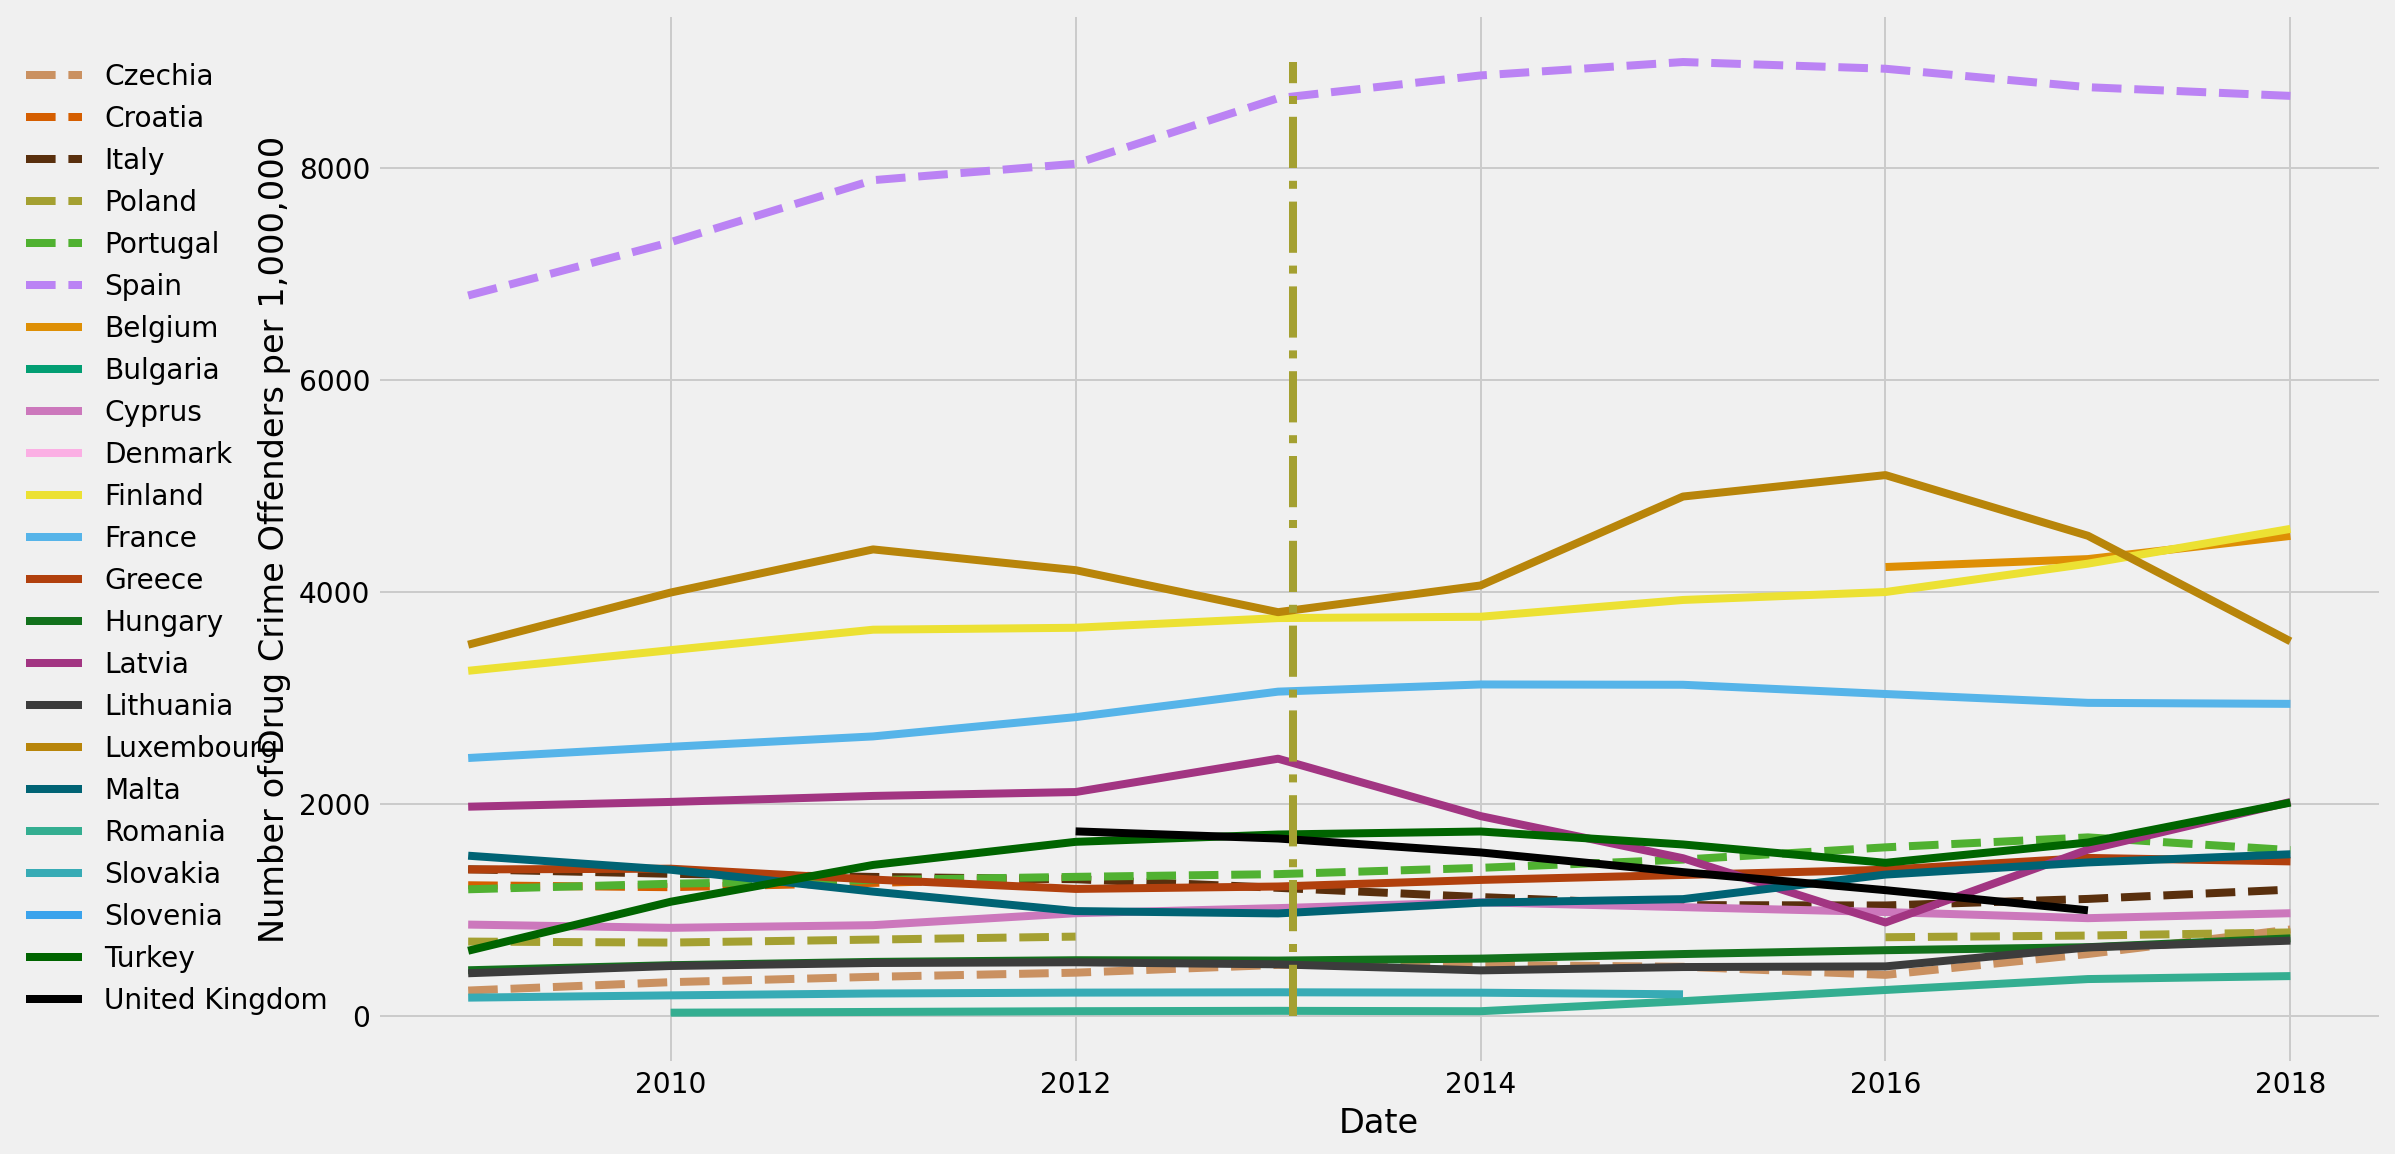

In [15]:
decriminalised_offenders = offenders_per_capita[decriminalised_countries_off]
criminalised_offenders = offenders_per_capita[criminalised_countries_off]

plt.figure(figsize = (16, 9))

for country in decriminalised_offenders.columns:
    plt.plot(decriminalised_offenders.index, decriminalised_offenders[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')

for country in criminalised_offenders.columns:
    plt.plot(criminalised_offenders.index, criminalised_offenders[country].rolling(window = 3).mean(),
    color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country)


# Shifted slightly lines to prevent overlapping on graph. Keep them visible.
plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')


# labelling the axes
plt.xlabel('Date')
plt.ylabel('Number of Drug Crime Offenders per 1,000,000')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.1, 0.5), ncol = 1, frameon=False);

plt.savefig('numoffendersallcountrieslineplot.png', bbox_inches='tight')



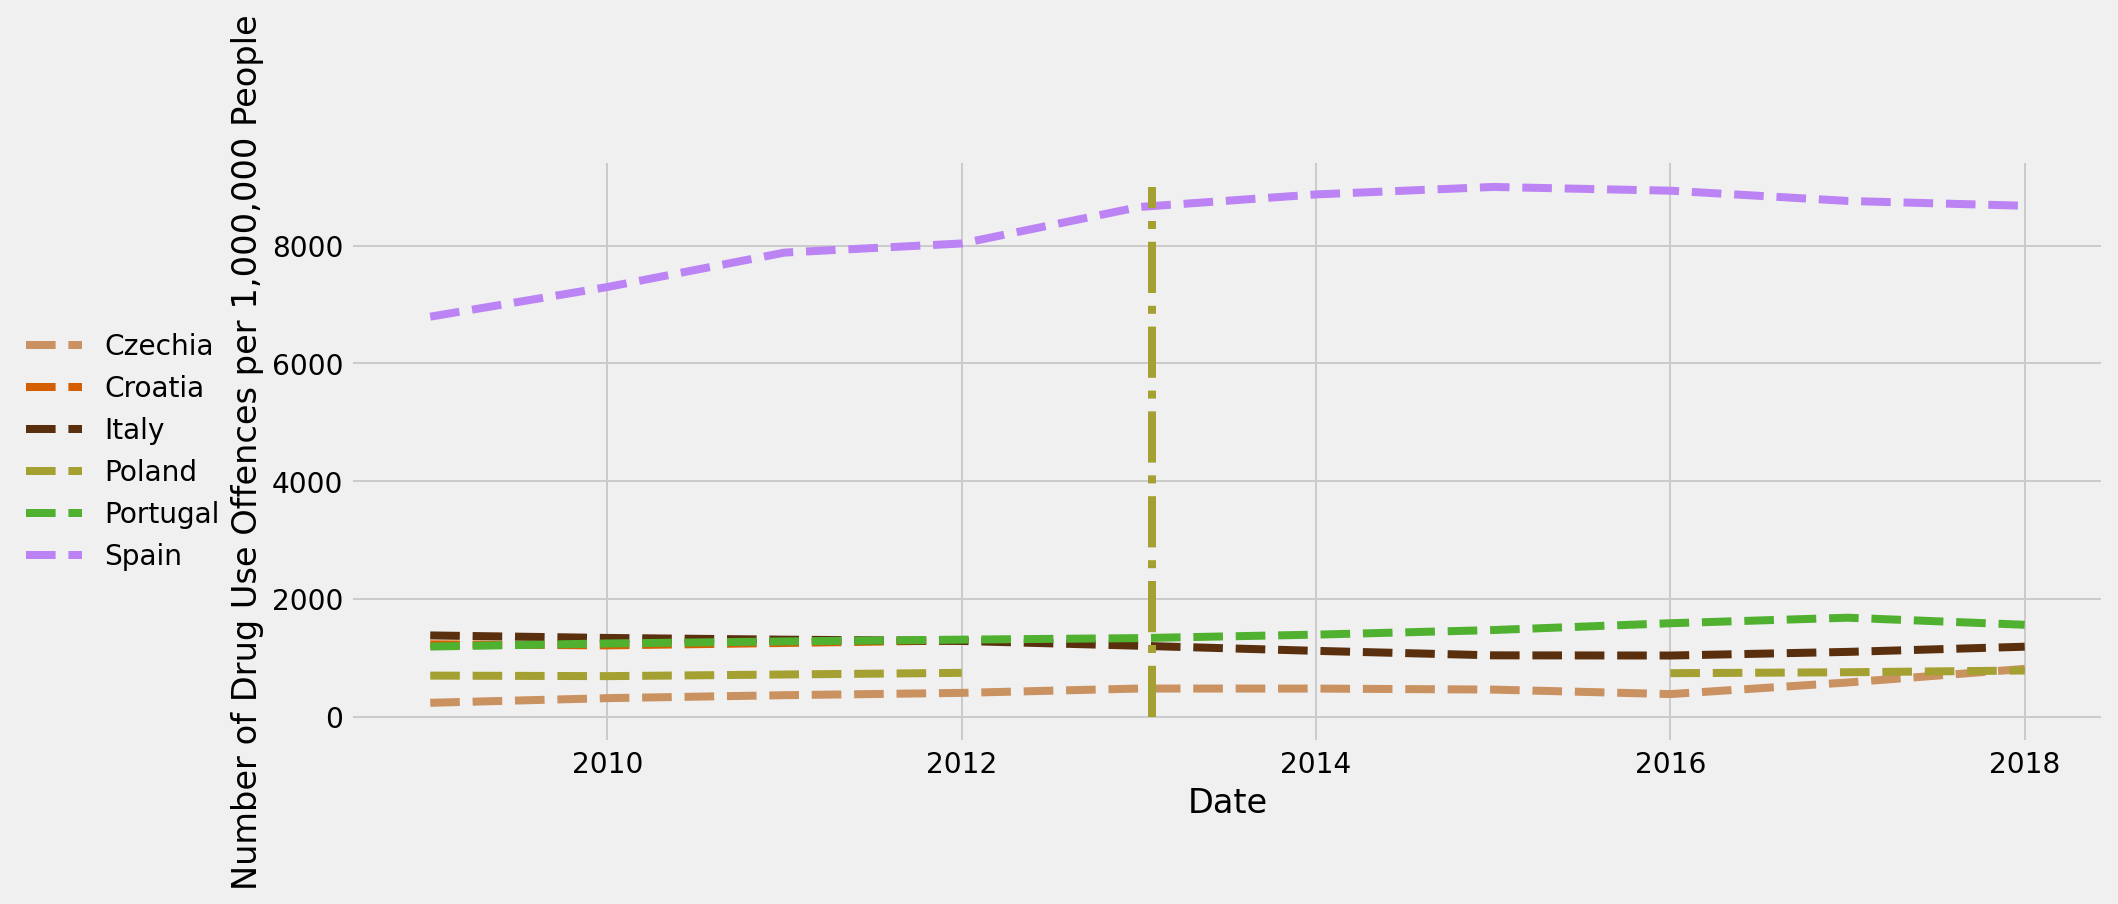

In [16]:
# setting the fig size, the matplotlib way
plt.figure(figsize = (14, 5))

for country in decriminalised_offenders.columns:
    plt.plot(decriminalised_offenders.index, decriminalised_offenders[country].rolling(window = 3).mean(),
            color = europe_criminalisation_status_with_colour.loc[country]['Colour'], label = country,
            linestyle = '--')
# Italy and Czechia, and Poland and Croatia decriminalised on the same years. 

plt.plot([(europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation']+ 0.075), (europe_criminalisation_status_with_colour.loc['Poland']['Date of Decriminalisation'])+ 0.075], [0, 9000],
color = europe_criminalisation_status_with_colour.loc['Poland']['Colour'], linestyle = 'dashdot')

    
    
# labelling the axes
plt.xlabel('Date')
plt.ylabel('Number of Drug Use Offences per 1,000,000 People')

# show the legend
plt.legend(loc = 'center', bbox_to_anchor=(-0.13, 0.5), ncol = 1, frameon=False);
#plt.text(1986,112,  '(Vertical dashed lines indicate date of decriminalisation per country)', ha='left')

plt.savefig('numoffendersdecrimcountrieslineplot.png', bbox_inches='tight')

## Section Two

#### Mean Overdoses from 2014-2018 by Drug Law Severity (bar chart and boxplot)

In [17]:
Drug_Laws_Leniency_Scoring_Mean_TotOnly = pd.read_csv('Drug_Laws_Leniency_Scoring_Mean_TotOnly.csv').set_index('Country')

#Belgium is Nan for overdoses 2014-2018
Drug_Laws_Leniency_Scoring_Mean_TotOnly_od = Drug_Laws_Leniency_Scoring_Mean_TotOnly.drop(['Belgium'],axis=0).copy()
# Renaming country in the table used for selection as overdose data shows UK england and wales not full United Kingdom.
Drug_Laws_Leniency_Scoring_Mean_TotOnly_od = Drug_Laws_Leniency_Scoring_Mean_TotOnly_od.rename(index={'United Kingdom': 'UK (England & Wales)'})

# Creating lists for country selection per strictness
lenient_countries_od = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_od[Drug_Laws_Leniency_Scoring_Mean_TotOnly_od['Category']=='Lenient'].index.values)
moderate_countries_od = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_od[Drug_Laws_Leniency_Scoring_Mean_TotOnly_od['Category']=='Moderate'].index.values)
strict_countries_od = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_od[Drug_Laws_Leniency_Scoring_Mean_TotOnly_od['Category']=='Strict'].index.values)


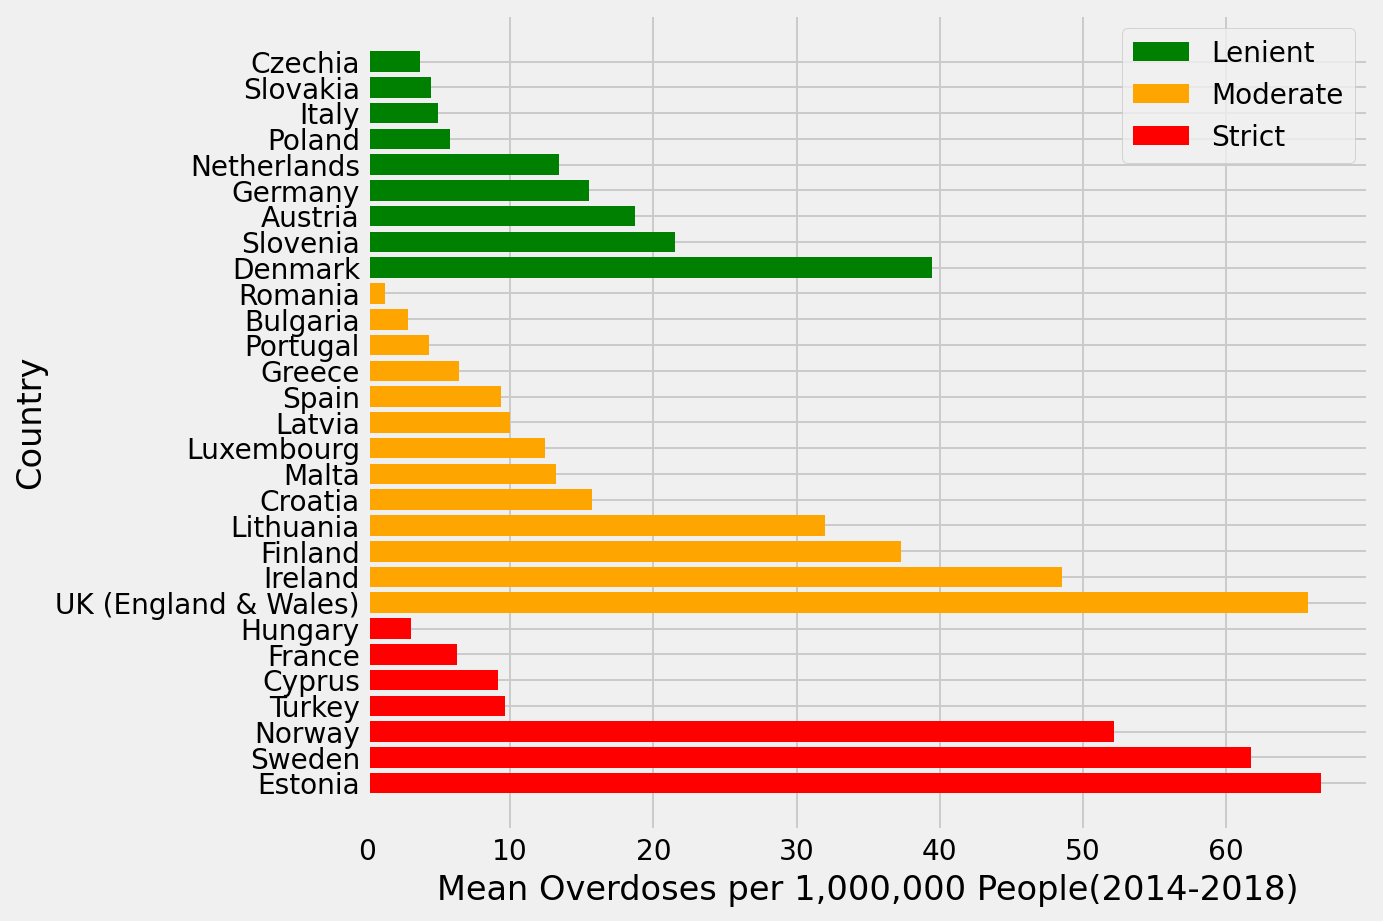

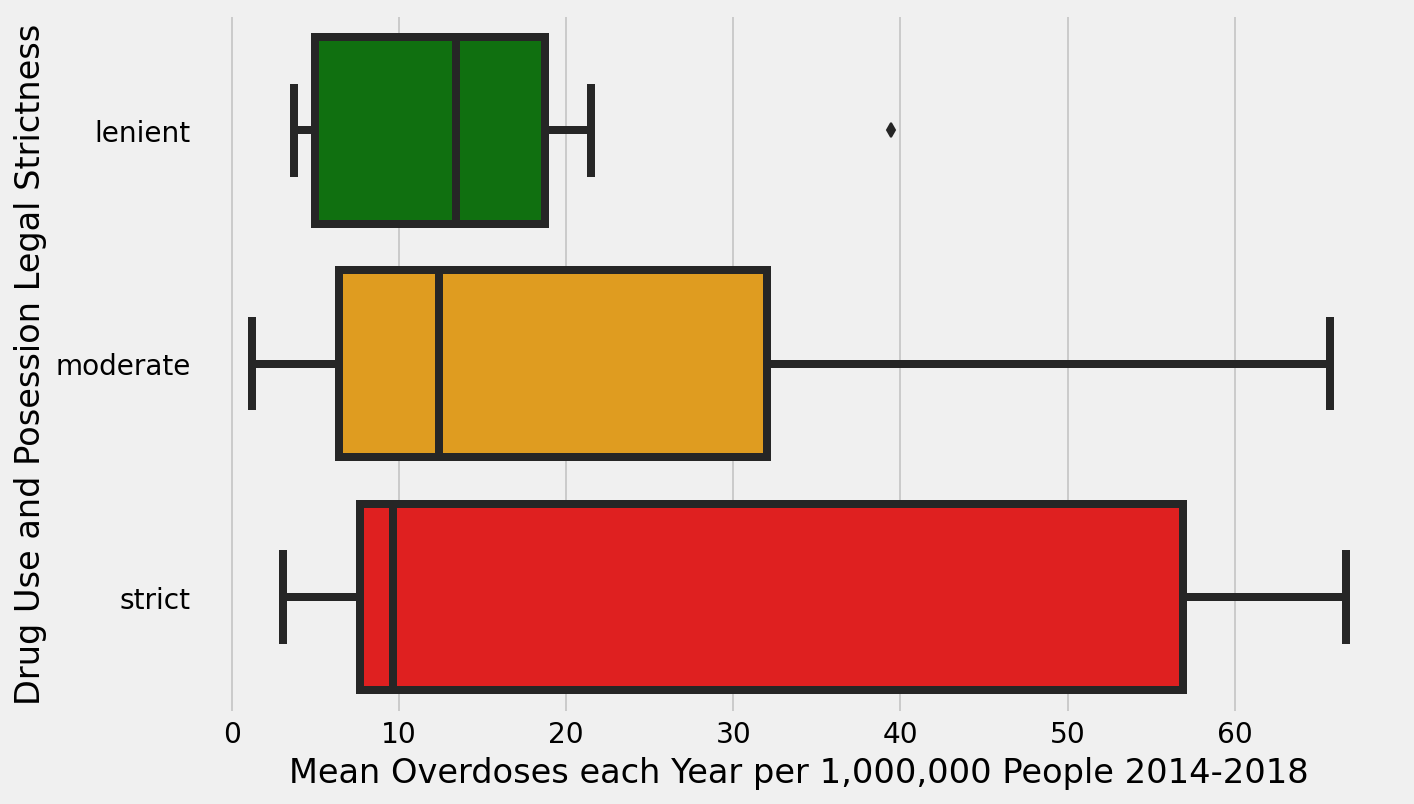

In [18]:
# Creating the dataframes for plotting, strictness separated.
lenient_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[lenient_countries_od].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)
moderate_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[moderate_countries_od].sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False).dropna()
strict_mn_2014_2018_od = Mean_overdosedeaths_2014_to_2018.loc[strict_countries_od].dropna().sort_values('Mean Overdoses per 1,000,000 People(2014-2018)', ascending = False)




# Plotting the bar plot
plt.figure(figsize = (8, 7))

for country in strict_mn_2014_2018_od.index:
    #if country in a['Country']:
    plt.barh(strict_mn_2014_2018_od.index , strict_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly_od.loc[country]['ColourCategory'])
    
for country in moderate_mn_2014_2018_od.index:
    #if country in a['Country']:
    plt.barh(moderate_mn_2014_2018_od.index , moderate_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly_od.loc[country]['ColourCategory'])
    
for country in lenient_mn_2014_2018_od.index:
    #if country in a['Country']:
    plt.barh(lenient_mn_2014_2018_od.index , lenient_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly_od.loc[country]['ColourCategory'])
    

# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Green', label = 'Lenient')
plt.barh(0 , 0, color = 'Orange', label = 'Moderate')
plt.barh(0 , 0, color = 'Red', label = 'Strict')

plt.xlabel('Mean Overdoses per 1,000,000 People(2014-2018)')
plt.ylabel('Country')
plt.legend();
plt.savefig('odleniencybarchart.png', bbox_inches='tight')






# Plotting the boxplot
# Creating a concatenated table similar to that of the others, but with all countries renamed to their relevant strictness assignation. Allows easy plotting with seaborn.
bxplt_lenient_mn_2014_2018_od = lenient_mn_2014_2018_od.reset_index().copy()
bxplt_lenient_mn_2014_2018_od['index'] = 'lenient'
bxplt_lenient_mn_2014_2018_od = bxplt_lenient_mn_2014_2018_od.set_index('index')
bxplt_moderate_mn_2014_2018_od = moderate_mn_2014_2018_od.reset_index().copy()
bxplt_moderate_mn_2014_2018_od['index'] = 'moderate'
bxplt_moderate_mn_2014_2018_od = bxplt_moderate_mn_2014_2018_od.set_index('index')
bxplt_strict_mn_2014_2018_od = strict_mn_2014_2018_od.reset_index().copy()
bxplt_strict_mn_2014_2018_od['index'] = 'strict'
bxplt_strict_mn_2014_2018_od = bxplt_strict_mn_2014_2018_od.set_index('index')
bxplt_strict_mn_2014_2018_od

concat_bxplot_mn_2014_2018_od = pd.concat([bxplt_lenient_mn_2014_2018_od, bxplt_moderate_mn_2014_2018_od, bxplt_strict_mn_2014_2018_od], join="inner").reset_index()



plt.figure(figsize=(9.6,6))
my_pal = {"lenient": "g", "moderate": "orange", "strict":"r"}
# 'Index' column is strictness, just a different name because we concatenated.
sns.boxplot(x = concat_bxplot_mn_2014_2018_od['Mean Overdoses per 1,000,000 People(2014-2018)'], y = concat_bxplot_mn_2014_2018_od['index'],  palette = my_pal, orient='h')
plt.ylabel('Drug Use and Posession Legal Strictness');
plt.xlabel('Mean Overdoses each Year per 1,000,000 People 2014-2018')
# Line is the median. Significant overlap. Diminishing returns after decriminalisation? Other factors that matter more after not seeing addicts as criminals?
plt.savefig('odleniencybxplt.png', bbox_inches='tight')



#### Mean Number of Use Offences from 2014-2018 by Drug Law Severity (bar chart and boxplot)

In [19]:
# Dropping the rows that don't have 2014-2018 data.
Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff = Drug_Laws_Leniency_Scoring_Mean_TotOnly.drop(['Austria','Netherlands','Bulgaria','Romania'],axis=0).copy()

# Creating lists for country selection per strictness
lenient_countries_useoff = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff[Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff['Category']=='Lenient'].index.values)
moderate_countries_useoff = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff[Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff['Category']=='Moderate'].index.values)
strict_countries_useoff = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff[Drug_Laws_Leniency_Scoring_Mean_TotOnly_useoff['Category']=='Strict'].index.values)


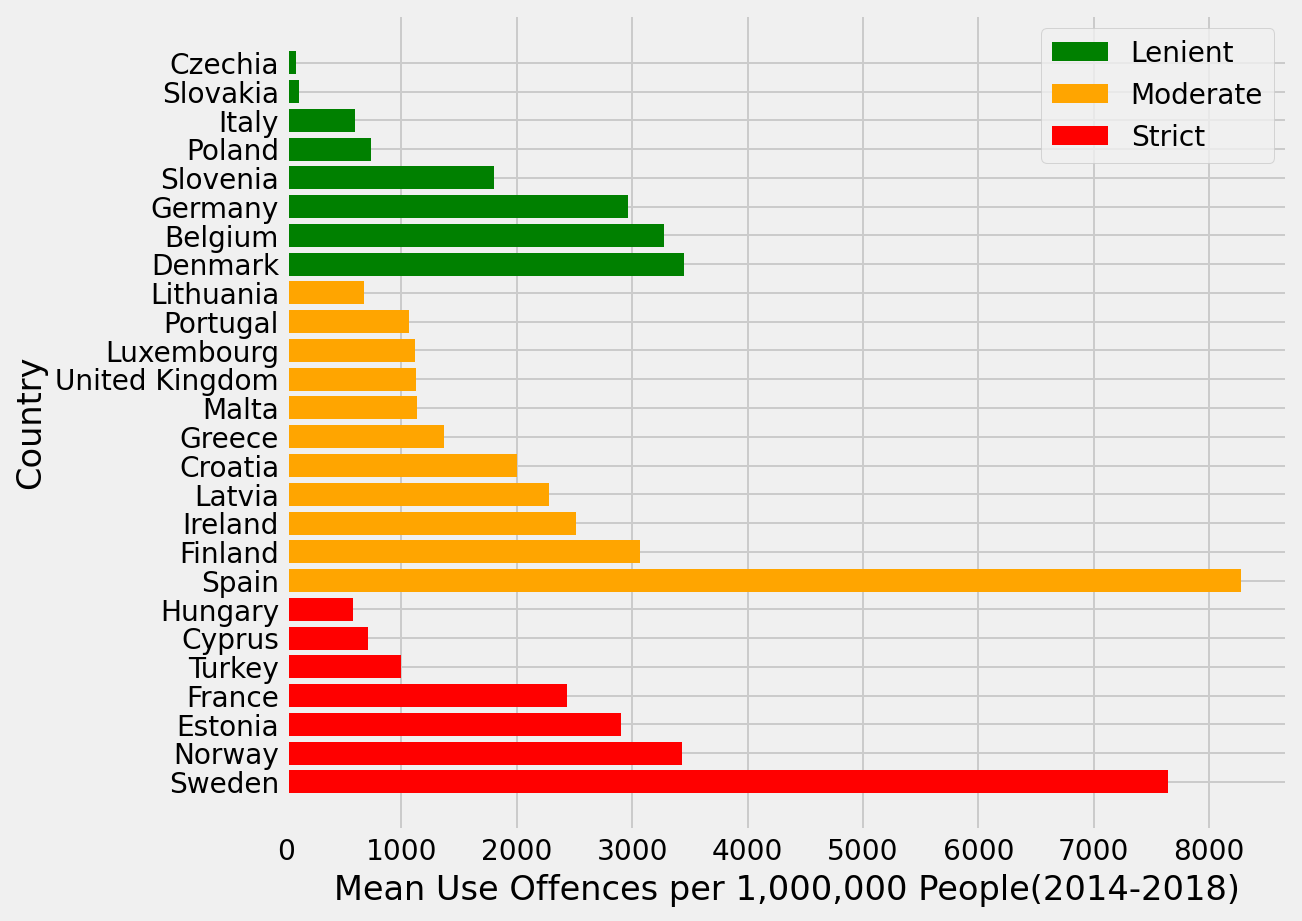

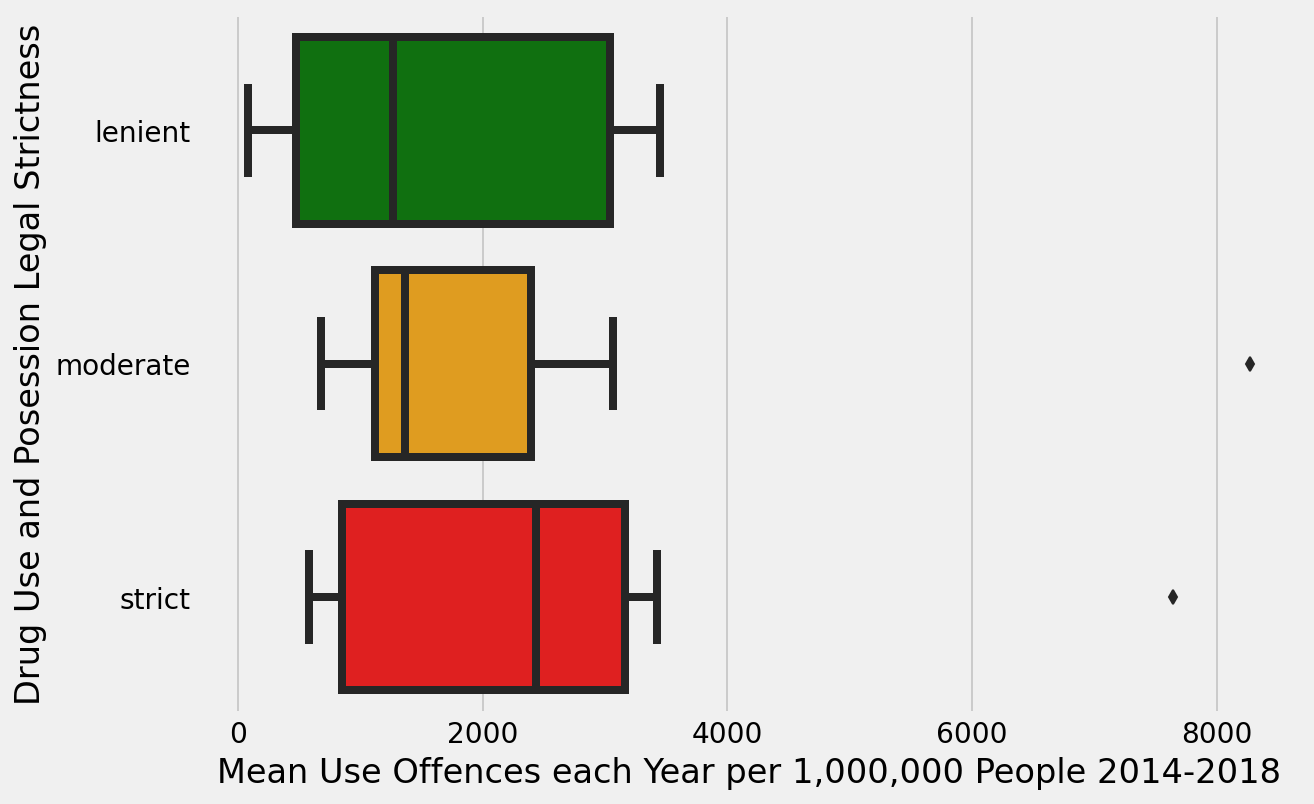

In [20]:
# Creating the dataframes for plotting, strictness separated.
lenient_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[lenient_countries_useoff].dropna().sort_values('Mean Use Offences per 1,000,000 People(2014-2018)', ascending = False)
moderate_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[moderate_countries_useoff].dropna().sort_values('Mean Use Offences per 1,000,000 People(2014-2018)', ascending = False)
strict_mn_2014_2018_useoff = Mean_use_offences_per_capita_2014_to_2018.loc[strict_countries_useoff].dropna().sort_values('Mean Use Offences per 1,000,000 People(2014-2018)', ascending = False)




# Plotting the bar plot
plt.figure(figsize = (8, 7))
for country in strict_mn_2014_2018_useoff.index:
    #if country in a['Country']:
    plt.barh(strict_mn_2014_2018_useoff.index , strict_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])
    
for country in moderate_mn_2014_2018_useoff.index:
    #if country in a['Country']:
    plt.barh(moderate_mn_2014_2018_useoff.index , moderate_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])
    
for country in lenient_mn_2014_2018_useoff.index:
    #if country in a['Country']:
    plt.barh(lenient_mn_2014_2018_useoff.index , lenient_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])
    

# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Green', label = 'Lenient')
plt.barh(0 , 0, color = 'Orange', label = 'Moderate')
plt.barh(0 , 0, color = 'Red', label = 'Strict')

plt.xlabel('Mean Use Offences per 1,000,000 People(2014-2018)')
plt.ylabel('Country')
plt.legend();
plt.savefig('useoffleniencybarchart.png', bbox_inches='tight')



# Plotting the boxplot
# Creating a concatenated table similar to that of the others, but with all countries renamed to their relevant strictness assignation. Allows easy plotting with seaborn.
bxplt_lenient_mn_2014_2018_useoff = lenient_mn_2014_2018_useoff.reset_index().copy()
bxplt_lenient_mn_2014_2018_useoff['index'] = 'lenient'
bxplt_lenient_mn_2014_2018_useoff = bxplt_lenient_mn_2014_2018_useoff.set_index('index')
bxplt_moderate_mn_2014_2018_useoff = moderate_mn_2014_2018_useoff.reset_index().copy()
bxplt_moderate_mn_2014_2018_useoff['index'] = 'moderate'
bxplt_moderate_mn_2014_2018_useoff = bxplt_moderate_mn_2014_2018_useoff.set_index('index')
bxplt_strict_mn_2014_2018_useoff = strict_mn_2014_2018_useoff.reset_index().copy()
bxplt_strict_mn_2014_2018_useoff['index'] = 'strict'
bxplt_strict_mn_2014_2018_useoff = bxplt_strict_mn_2014_2018_useoff.set_index('index')


concat_bxplot_mn_2014_2018_useoff = pd.concat([bxplt_lenient_mn_2014_2018_useoff, bxplt_moderate_mn_2014_2018_useoff, bxplt_strict_mn_2014_2018_useoff]).reset_index()



plt.figure(figsize=(8.8,6))
my_pal = {"lenient": "g", "moderate": "orange", "strict":"r"}
# 'Index' column is strictness, just a different name because we concatenated.
sns.boxplot(x = concat_bxplot_mn_2014_2018_useoff['Mean Use Offences per 1,000,000 People(2014-2018)'], y = concat_bxplot_mn_2014_2018_useoff['index'],  palette = my_pal, orient='h')
plt.ylabel('Drug Use and Posession Legal Strictness');
plt.xlabel('Mean Use Offences each Year per 1,000,000 People 2014-2018')
# Line is the median. Significant overlap. Diminishing returns after decriminalisation? Other factors that matter more after not seeing addicts as criminals?
plt.savefig('useoffleniencybxplt.png', bbox_inches='tight')


#### Mean Number of Offenders from 2014-2018 by Drug Law Severity (bar chart and boxplot)

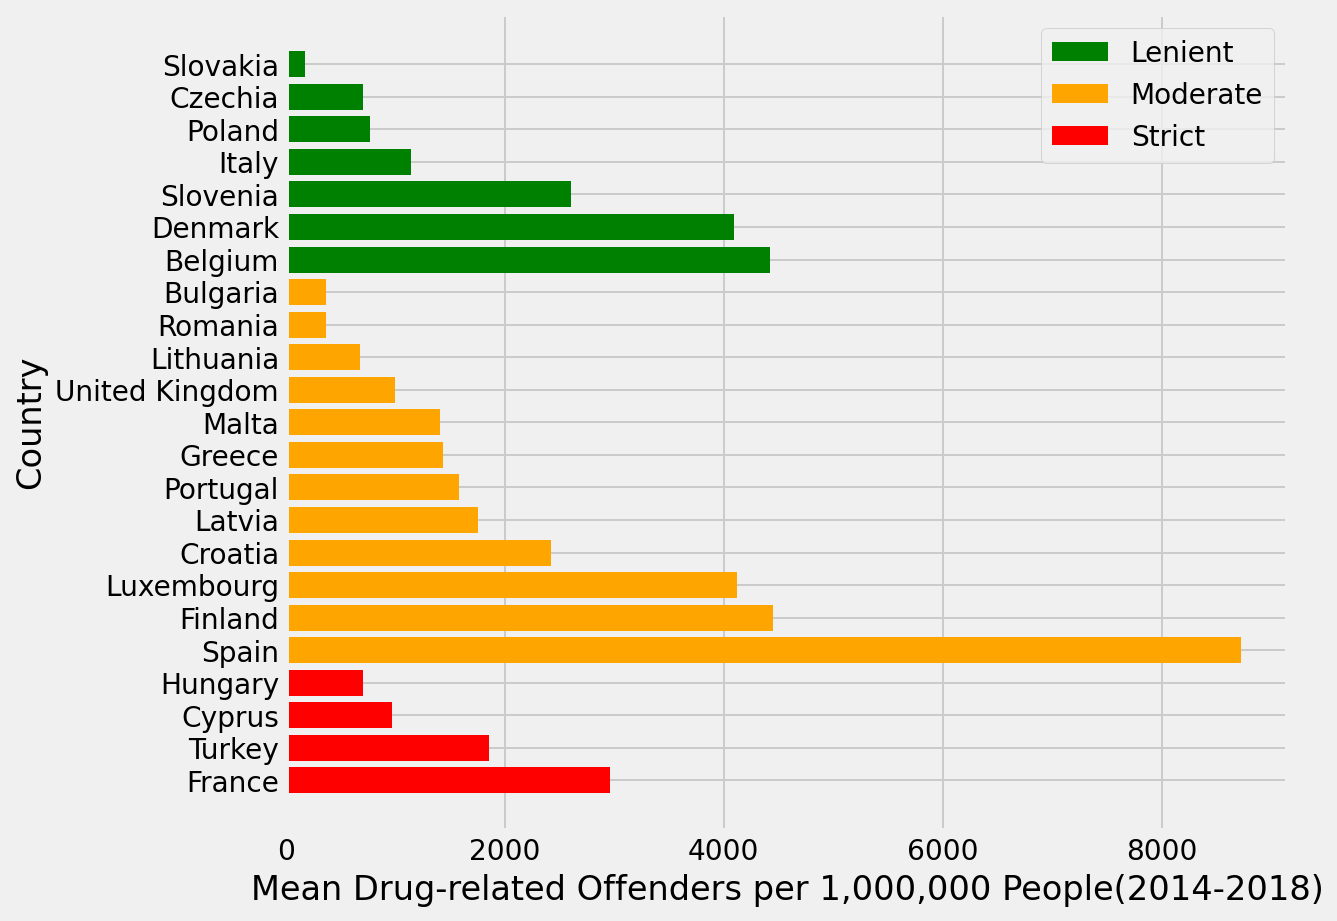

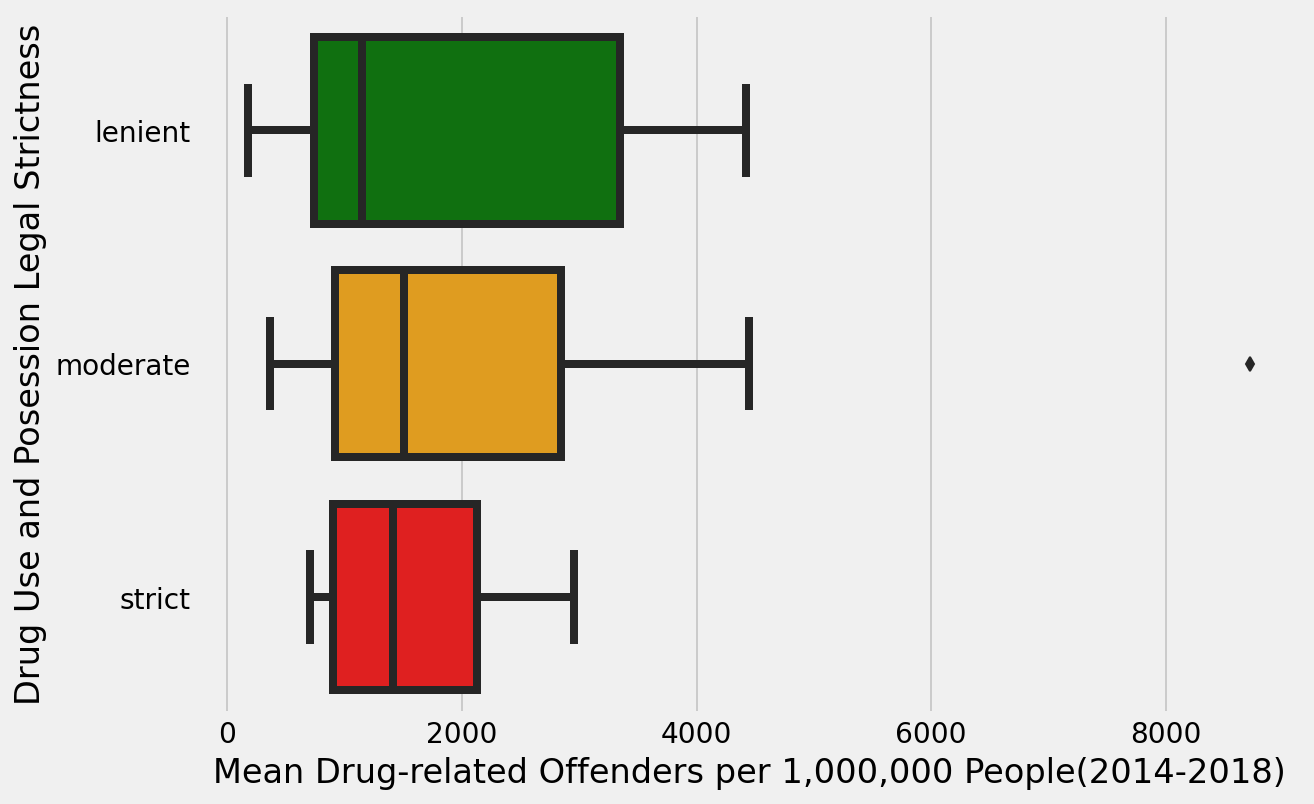

In [21]:
# The dropped countries didn't have enough data between the years (set by previous precedent)
Drug_Laws_Leniency_Scoring_Mean_TotOnly_off = Drug_Laws_Leniency_Scoring_Mean_TotOnly.drop(['Austria','Germany','Netherlands','Ireland','Estonia','Norway','Sweden'],axis=0).copy()

# Creating lists for country selection per strictness
lenient_countries_off = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Lenient'].index)
moderate_countries_off = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Moderate'].index)
strict_countries_off = pd.Series(Drug_Laws_Leniency_Scoring_Mean_TotOnly_off[Drug_Laws_Leniency_Scoring_Mean_TotOnly_off['Category']=='Strict'].index)

# Creating databases for plotting of each strictness separately.
lenient_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[lenient_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)
moderate_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[moderate_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)
strict_mn_2014_2018_off = Mean_offenders_per_capita_2014_to_2018.loc[strict_countries_off].dropna().sort_values('Mean Drug-related Offenders per 1,000,000 People(2014-2018)', ascending = False)


# Plotting the bar plot
plt.figure(figsize = (8, 7))

for country in strict_mn_2014_2018_off.index:
    plt.barh(strict_mn_2014_2018_off.index , strict_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])

for country in moderate_mn_2014_2018_off.index:
    plt.barh(moderate_mn_2014_2018_off.index , moderate_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])
    
for country in lenient_mn_2014_2018_off.index:
    plt.barh(lenient_mn_2014_2018_off.index , lenient_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'],
            color = Drug_Laws_Leniency_Scoring_Mean_TotOnly.loc[country]['ColourCategory'])
    

# Plotting a 'fake' bar for the purpose of adding a legend for the others.
plt.barh(0 , 0, color = 'Green', label = 'Lenient')
plt.barh(0 , 0, color = 'Orange', label = 'Moderate')
plt.barh(0 , 0, color = 'Red', label = 'Strict')

plt.xlabel('Mean Drug-related Offenders per 1,000,000 People(2014-2018)')
plt.ylabel('Country')
plt.legend();
plt.savefig('offleniencybarchart.png', bbox_inches='tight')




# Plotting the boxplot
# Creating a concatenated table similar to that of the others, but with all countries renamed to their relevant strictness assignation. Allows easy plotting with seaborn.
bxplt_lenient_mn_2014_2018_off = lenient_mn_2014_2018_off.reset_index().copy()
bxplt_lenient_mn_2014_2018_off['index'] = 'lenient'
bxplt_lenient_mn_2014_2018_off = bxplt_lenient_mn_2014_2018_off.set_index('index')
bxplt_moderate_mn_2014_2018_off = moderate_mn_2014_2018_off.reset_index().copy()
bxplt_moderate_mn_2014_2018_off['index'] = 'moderate'
bxplt_moderate_mn_2014_2018_off = bxplt_moderate_mn_2014_2018_off.set_index('index')
bxplt_strict_mn_2014_2018_off = strict_mn_2014_2018_off.reset_index().copy()
bxplt_strict_mn_2014_2018_off['index'] = 'strict'
bxplt_strict_mn_2014_2018_off = bxplt_strict_mn_2014_2018_off.set_index('index')


concat_bxplot_lenient_mn_2014_2018_off = pd.concat([bxplt_lenient_mn_2014_2018_off, bxplt_moderate_mn_2014_2018_off, bxplt_strict_mn_2014_2018_off]).reset_index()


plt.figure(figsize=(8.8,6))
my_pal = {"lenient": "g", "moderate": "orange", "strict":"r"}
# 'Index' column is strictness, just a different name because we concatenated.
sns.boxplot(x = concat_bxplot_lenient_mn_2014_2018_off['Mean Drug-related Offenders per 1,000,000 People(2014-2018)'], y = concat_bxplot_lenient_mn_2014_2018_off['index'],  palette = my_pal, orient='h')
plt.ylabel('Drug Use and Posession Legal Strictness');
plt.xlabel('Mean Drug-related Offenders per 1,000,000 People(2014-2018)')
# Line is the median. Significant overlap. Diminishing returns after decriminalisation? Other factors that matter more after not seeing addicts as criminals?
plt.savefig('offleniencybxplt.png', bbox_inches='tight')
